In [1]:
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from __future__ import division
from IPython.core.debugger import set_trace

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
houses = pd.read_csv('./data/train.csv')
test_houses = pd.read_csv('./data/test.csv')

In [3]:
houses.shape

(1460, 81)

In [4]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### SalePrice

In [6]:
houses['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

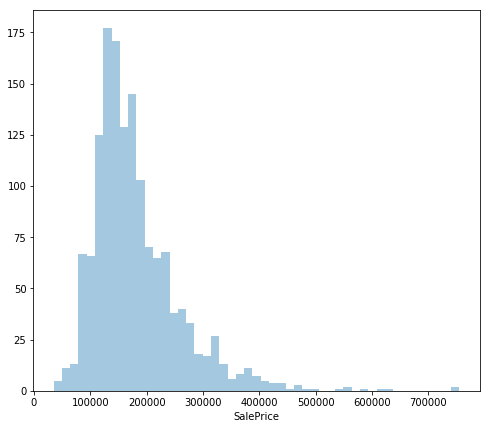

In [7]:
plt.figure(figsize=(8, 7))
sns.distplot(houses['SalePrice'], kde=False)
plt.show()

In [8]:
print(f"Skewness: {houses['SalePrice'].skew()}")
print(f"Kurtosis: {houses['SalePrice'].kurt()}")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


<span style='color:green'>SalePrice is **highly positive skewed** (Skewness > 1)</span><br>
<span style='color:green'>SalePrice have **heavy outliers**(kurtosis > 3)</span>

### MSSubClass

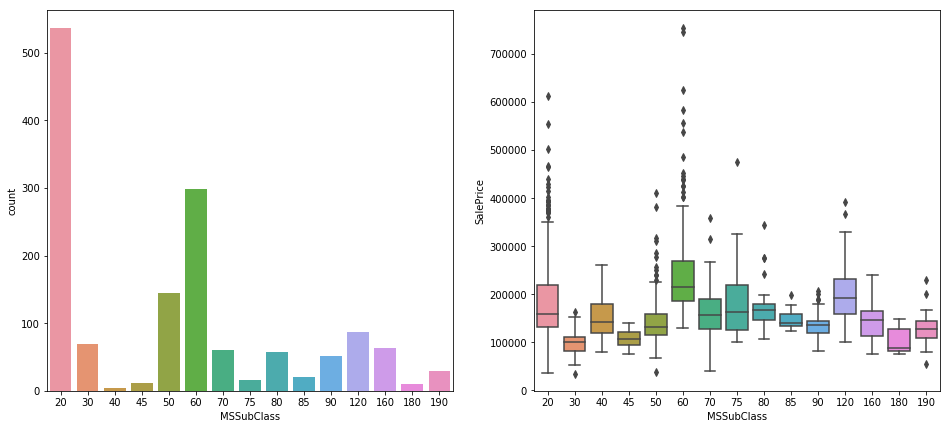

In [9]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['MSSubClass'])
plt.subplot(122)
sns.boxplot(data=houses, x='MSSubClass', y='SalePrice')
plt.show()

<span style='color:red'>One-Hot Endcoding theses varaible</span>

### MSZoning

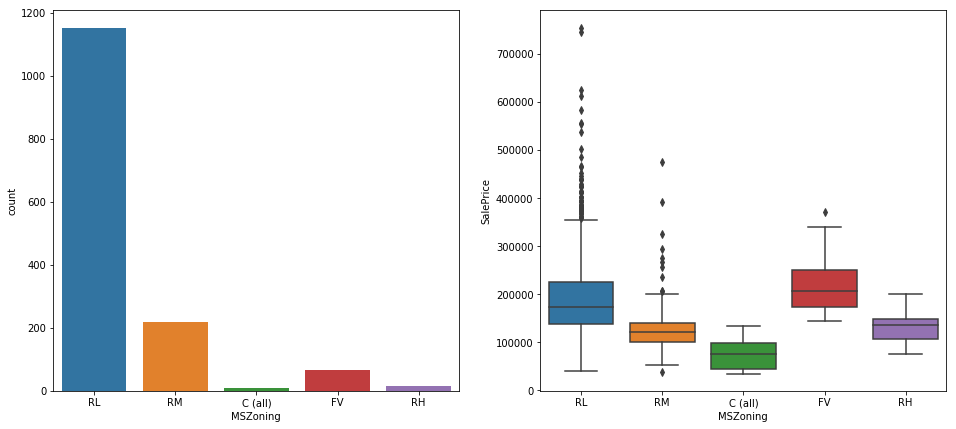

In [10]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['MSZoning'])
plt.subplot(122)
sns.boxplot(data=houses, x='MSZoning', y='SalePrice')
plt.show()

<span style='color:green'>Most of the houses are in **Low Density Residential** area</span><br>
<span style='color:red'>One-Hot Endcoding theses varaible</span>

### LotFrontage (width of street connected to the houses in feet)

In [11]:
houses['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

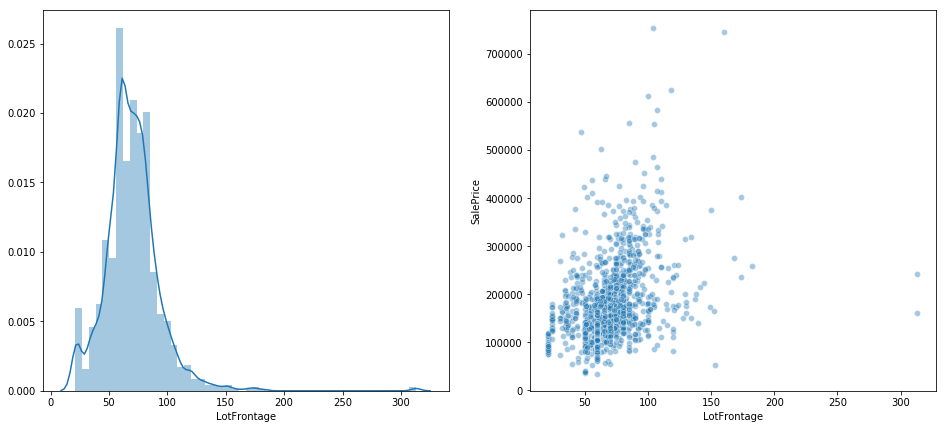

In [12]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(houses['LotFrontage'].dropna())
plt.subplot(122)
sns.scatterplot(x=houses['LotFrontage'], y=houses['SalePrice'], alpha=0.4)
plt.show()

In [13]:
houses.loc[:, ['LotFrontage', 'SalePrice']].corr()

,LotFrontage,SalePrice
LotFrontage,1.000000,0.351799
SalePrice,0.351799,1.000000


<span style='color:green'>The linear relationship between these variables are weak</span>

### LotArea (Lot size in square feet)

In [14]:
houses['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

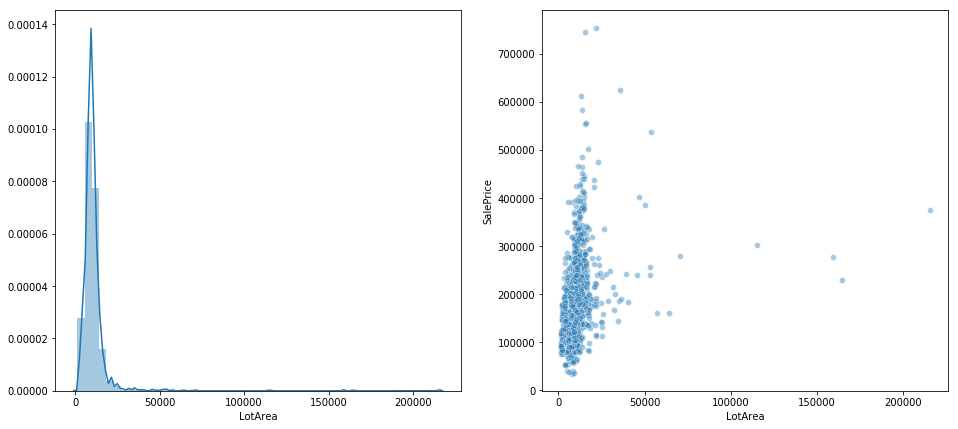

In [15]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(houses['LotArea'])
plt.subplot(122)
sns.scatterplot(data=houses, x='LotArea', y='SalePrice', alpha=0.4)
plt.show()

In [16]:
houses.loc[:, ['LotArea', 'SalePrice']].corr()

,LotArea,SalePrice
LotArea,1.000000,0.263843
SalePrice,0.263843,1.000000


### Street (Type of street connected to houses)

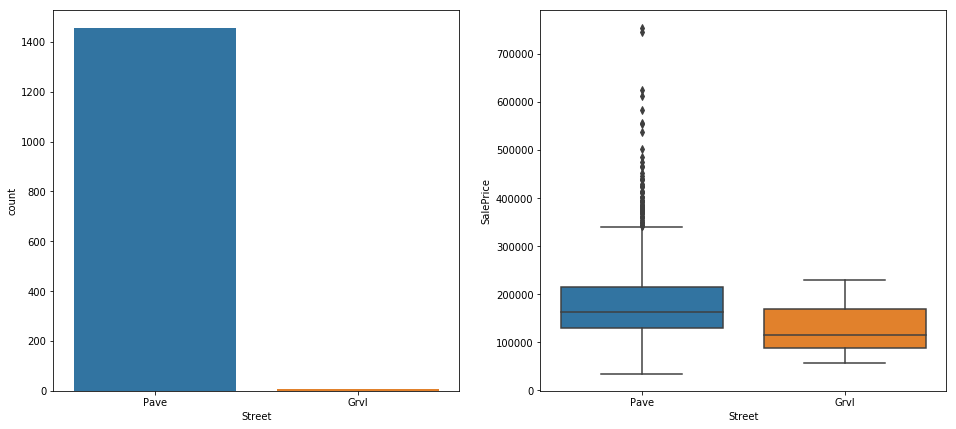

In [17]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['Street'])
plt.subplot(122)
sns.boxplot(x=houses['Street'], y=houses['SalePrice'])
plt.show()

<span style='color:green'>Most of the houses connected to pave streets</span><br>
<span style='color:green'>The SalePrice means of these 2 groups are quite resemble</span>

### Alley (Types of alley access to houses)

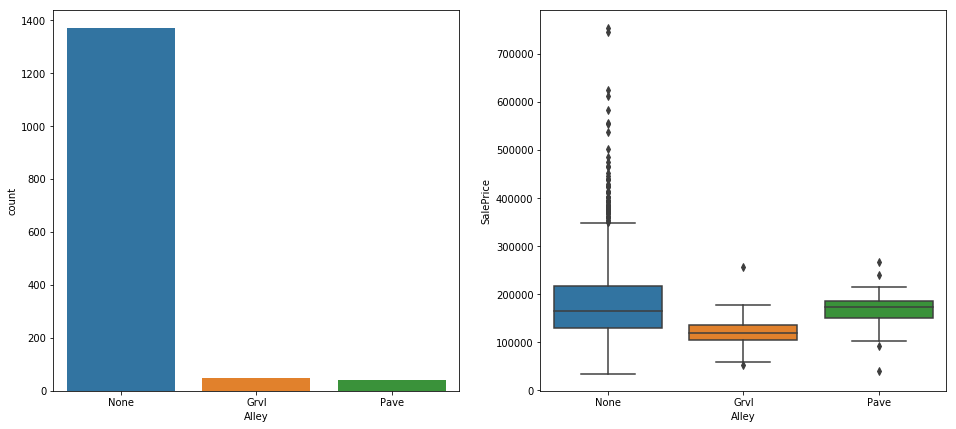

In [18]:
df = houses.copy()
df['Alley'].fillna('None', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(data=df, x='Alley')
plt.subplot(122)
sns.boxplot(data=df, x='Alley', y='SalePrice')
plt.show()

<span style='color:green'>Most of houses have no alley connected</span><br>
<span style='color:green'>Anyway, this variable doesn't affect SalePrice</span>

### LotShape

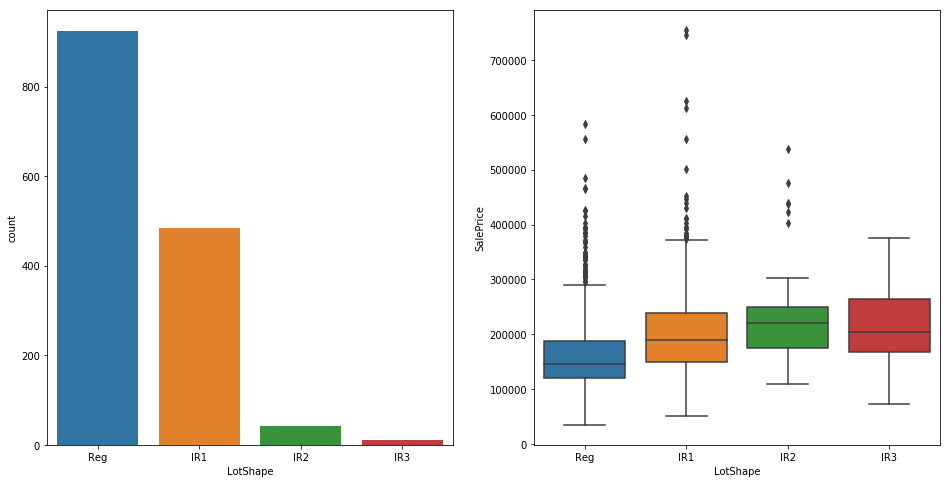

In [19]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(houses['LotShape'])
plt.subplot(122)
sns.boxplot(data=houses, x='LotShape', y='SalePrice')
plt.show()

<span style='color:green'>Lot Shape doesn't have significant effect on SalePrice</span>

### LandContour  (Flatness)

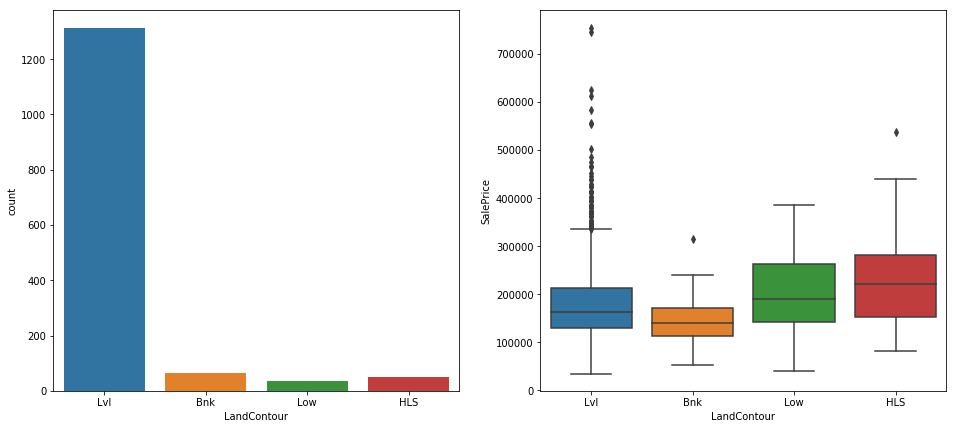

In [20]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['LandContour'])
plt.subplot(122)
sns.boxplot(data=houses, x='LandContour', y='SalePrice')
plt.show()

<span style='color:green'>LandCont doesn't have significant effect on SalePrice</span>

### LotConfig

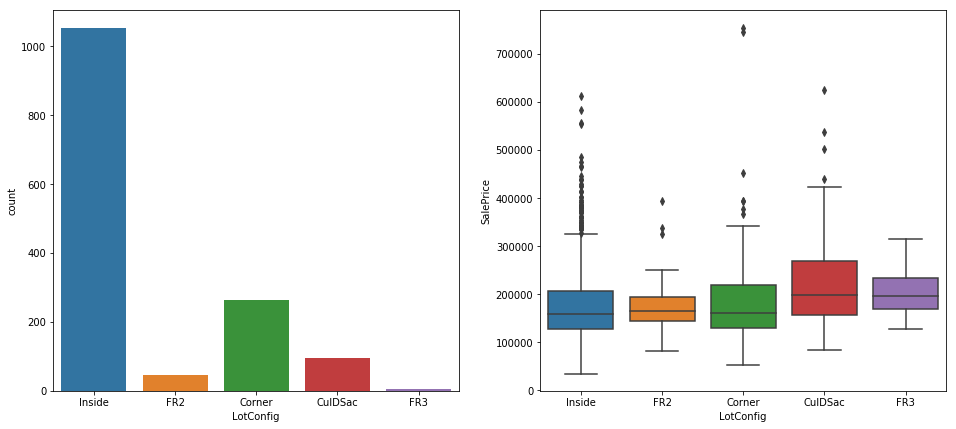

In [21]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['LotConfig'])
plt.subplot(122)
sns.boxplot(data=houses, x='LotConfig', y='SalePrice')
plt.show()

### LandSlope

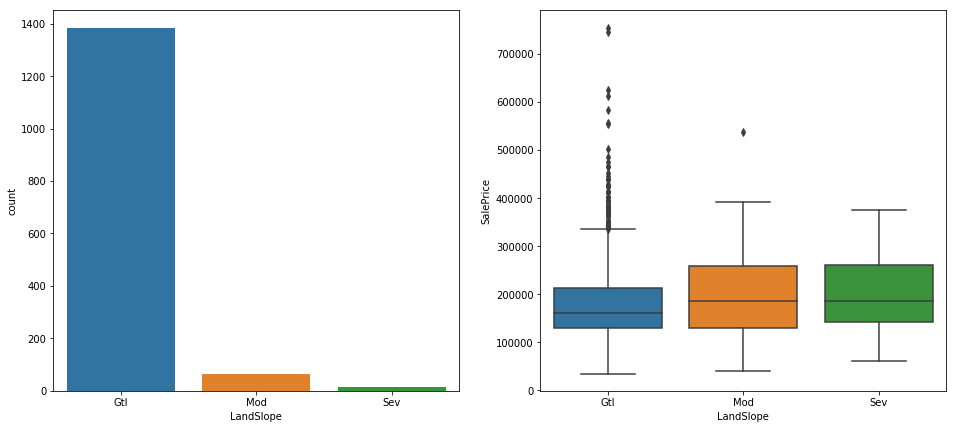

In [22]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['LandSlope'], order=['Gtl', 'Mod', 'Sev'])
plt.subplot(122)
sns.boxplot(data=houses, x='LandSlope', y='SalePrice', order=['Gtl', 'Mod', 'Sev'])
plt.show()

<span style='color:green'>Slope has no effect on SalePirce</span>

### Neighborhood

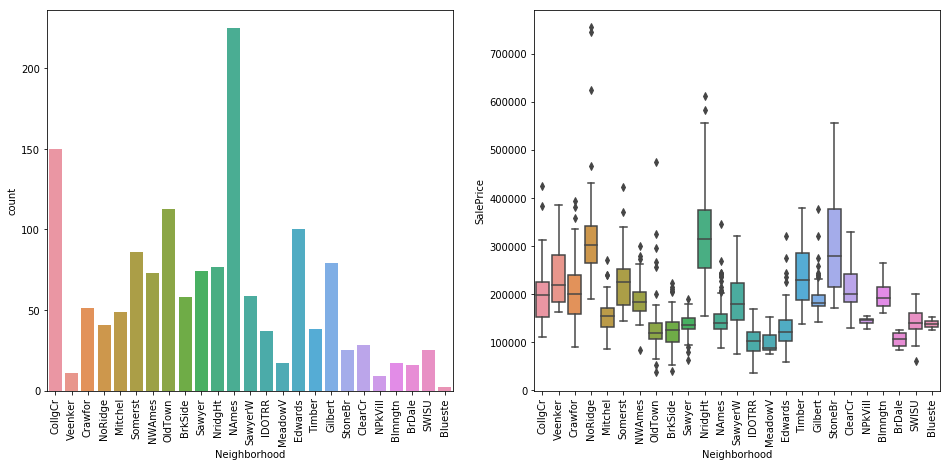

In [23]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['Neighborhood'])
plt.xticks(rotation=90)
plt.subplot(122)
sns.boxplot(data=houses, x='Neighborhood', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

<span style='color:green'>**Northridge Heights** seems to has wild range of SalePrice</span>
<br>
<span style='color:green'>**Northridge** has heavy outliers</span>


### Condition1 & Condition2 (describe the location of houses e.g. how far it is from public transportations)

In [24]:
df = houses.copy()

#new feature indicate if house is adjacent to main road
df['nearMainRoad'] = (df['Condition1'] == 'Artery') | (df['Condition2'] == 'Artery')

#new feature indicate if houses is within 200' of Railroad
df['within200RailRoad'] = (df['Condition1'] == 'RRNn') | (df['Condition1'] == 'RRNe') | (df['Condition2'] == 'RRNn') | (df['Condition2'] == 'RRNe')

#new feature indicate if houses is within near Railroad
df['nearRailRoad'] = (df['Condition1'] == 'RRAn') | (df['Condition1'] == 'RRAe') | (df['Condition2'] == 'RRAn') | (df['Condition2'] == 'RRAe')

#new feature indicate if houses is near park
df['nearPark'] = (df['Condition1'] == 'PosN') | (df['Condition1'] == 'PosA') | (df['Condition2'] == 'PosN') | (df['Condition2'] == 'PosA')

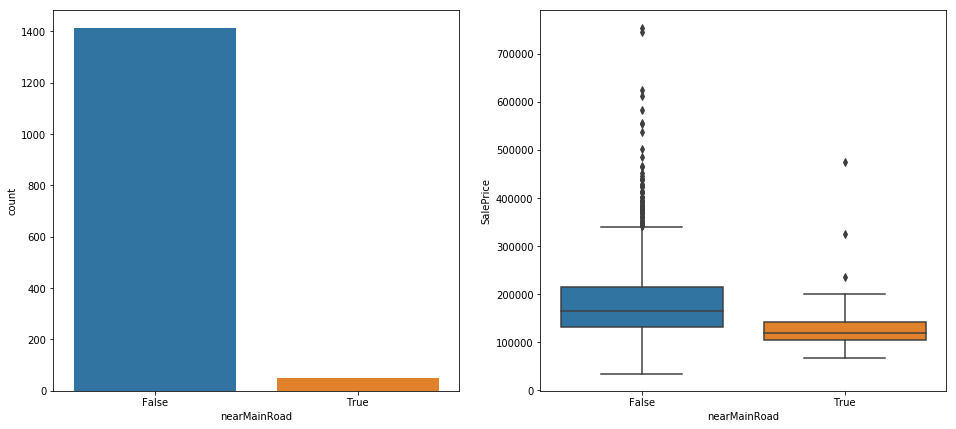

In [25]:
#plot nearMainRoad
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['nearMainRoad'])
plt.subplot(122)
sns.boxplot(data=df, x='nearMainRoad', y='SalePrice')
plt.show()

<span style='color:green'>houses near main road are little less expensive</span><br>
<span style='color:green'>and their SalePrice are more cling together</span><br>
<span style='color:red'>Create nearMainRoad feature</span>

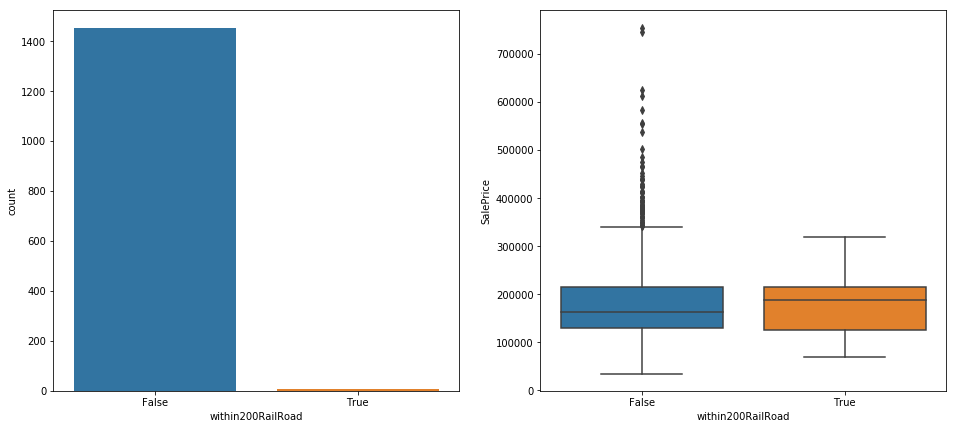

In [26]:
#plot within200RailRoad
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['within200RailRoad'])
plt.subplot(122)
sns.boxplot(data=df, x='within200RailRoad', y='SalePrice')
plt.show()

<span style='color:green'>houses within 200 near rail road are little more expensive</span><br>
<span style='color:green'>and their SalePrice are more cling together</span><br>

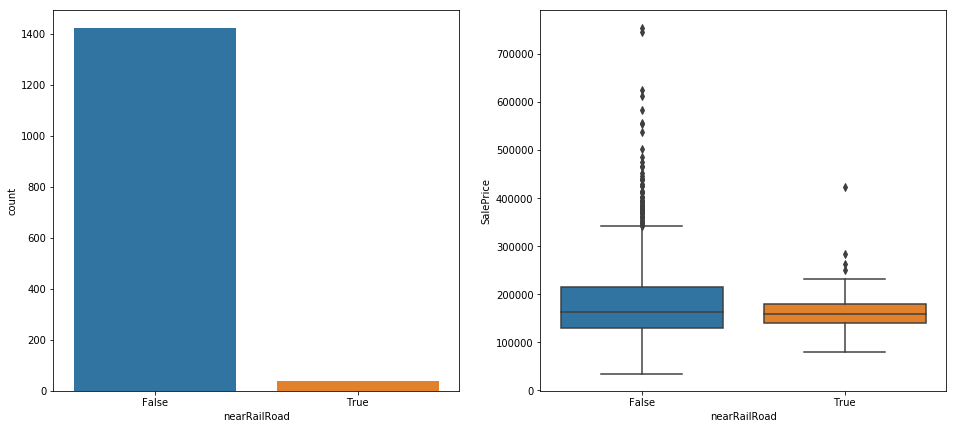

In [27]:
#plot nearRailRoad
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['nearRailRoad'])
plt.subplot(122)
sns.boxplot(data=df, x='nearRailRoad', y='SalePrice')
plt.show()

<span style='color:green'>same as above</span>

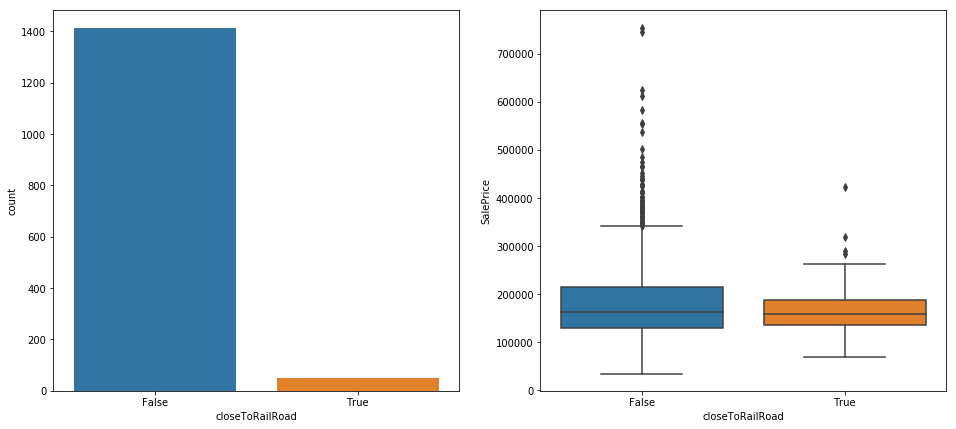

In [28]:
#combile nearRailRoad and within200RailRoad
df['closeToRailRoad'] = df['nearRailRoad'] | df['within200RailRoad']

#plot closeToRailRoad
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['closeToRailRoad'])
plt.subplot(122)
sns.boxplot(data=df, x='closeToRailRoad', y='SalePrice')
plt.show()

<span style='color:green'>**RailRoad seems to don't has much effect on SalePrice**</span><br>
<span style='color:green'>this pretty counter our intuition</span><br>
<span style='color:red'>Create closeToRailRoad feature</span>

### BldgType

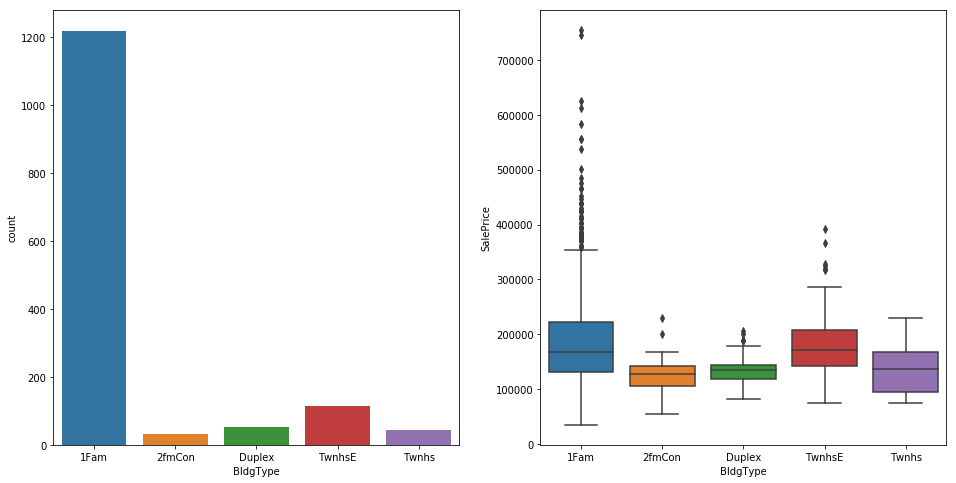

In [29]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(houses['BldgType'])
plt.subplot(122)
sns.boxplot(data=houses, x='BldgType', y='SalePrice')
plt.show()

### HouseStyle

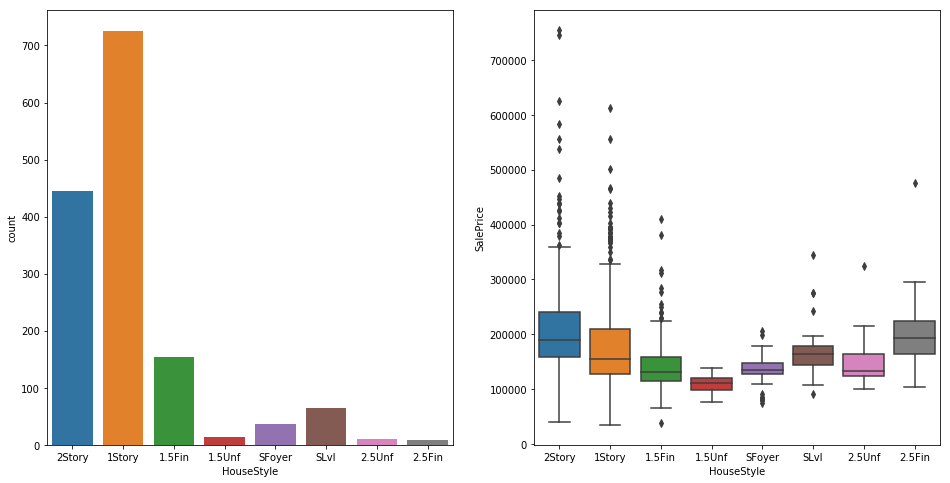

In [30]:
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.countplot(houses['HouseStyle'])
plt.subplot(122)
sns.boxplot(data=houses, x='HouseStyle', y='SalePrice')
plt.show()

### OverallQual (Overall material qualtities)

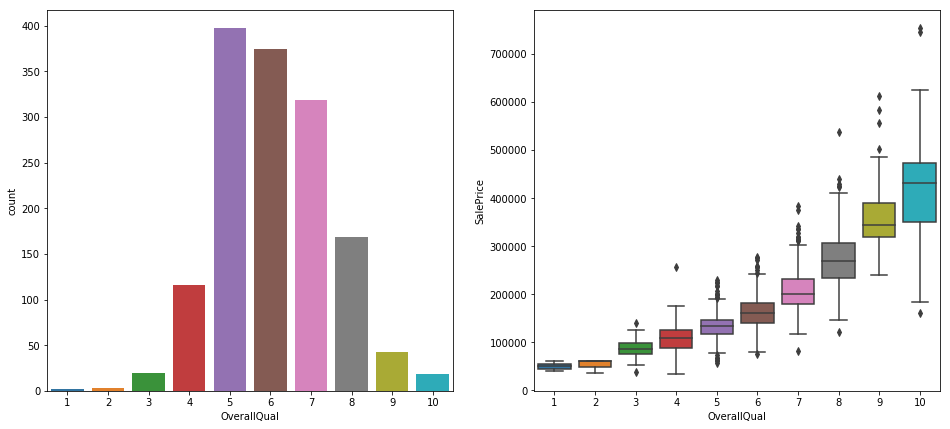

In [31]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['OverallQual'])
plt.subplot(122)
sns.boxplot(data=houses, x='OverallQual', y='SalePrice')
plt.show()

<span style='color:green'>Material qaulities seem to have a strong effect on SalePrice</span>

<span></span>

Let's bins this variables into 3 differents groups (Low, Medium, High)

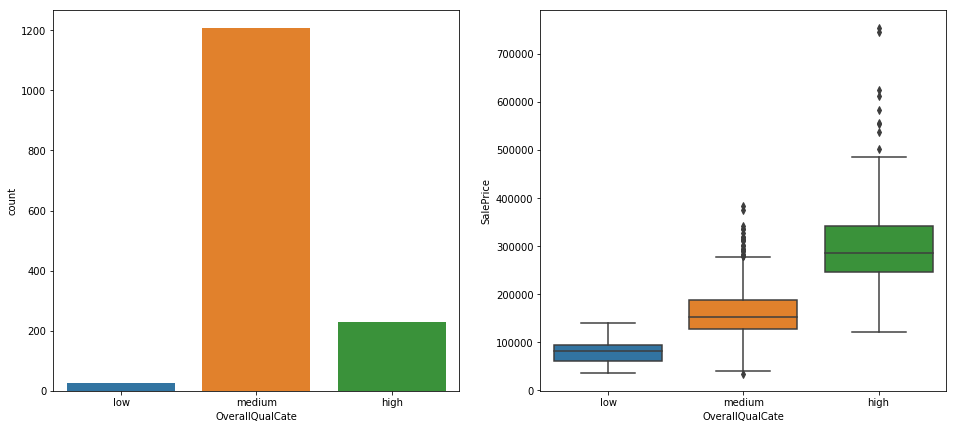

In [32]:
df = houses.copy()
df['OverallQualCate'] = pd.cut(df['OverallQual'], bins=[0, 3, 7, 10], labels=['low', 'medium', 'high'])

plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['OverallQualCate'])
plt.subplot(122)
sns.boxplot(data=df, x='OverallQualCate', y='SalePrice')
plt.show()

### OverallCond

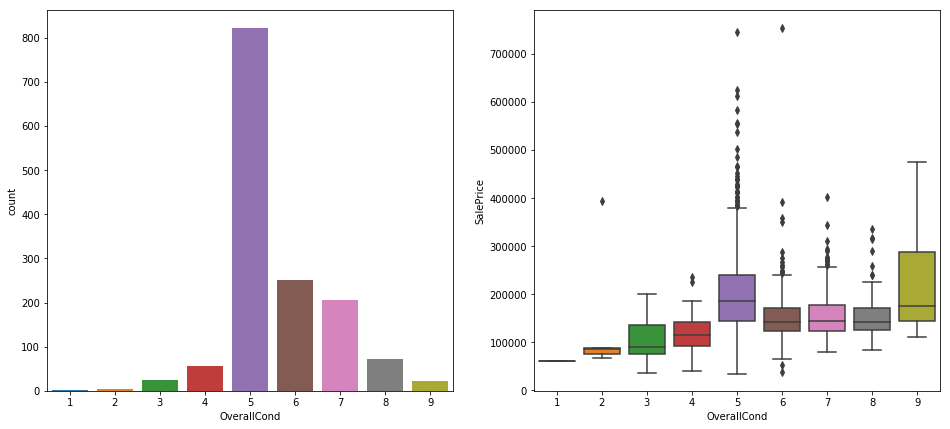

In [33]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['OverallCond'])
plt.subplot(122)
sns.boxplot(data=houses, x='OverallCond', y='SalePrice')
plt.show()

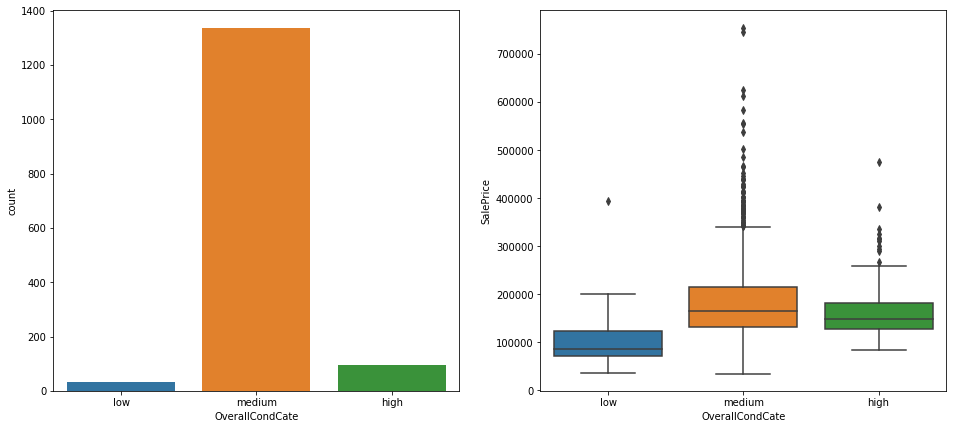

In [34]:
#bin OverallCond into 3 groups
df = houses.copy()
df['OverallCondCate'] = pd.cut(df['OverallCond'], bins=[0, 3, 7, 10], labels=['low', 'medium', 'high'])

plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['OverallCondCate'])
plt.subplot(122)
sns.boxplot(data=df, x='OverallCondCate', y='SalePrice')
plt.show()

### YearBuilt

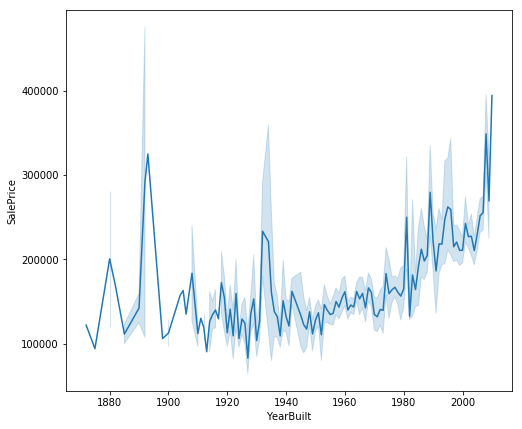

In [35]:
plt.figure(figsize=(8, 7))
sns.lineplot(data=houses, x='YearBuilt', y='SalePrice')
plt.show()

<span style='color:green'>YearBuilt seems to affect SalePrice, **this could be caused by inflation**</span>

### RoofStyle

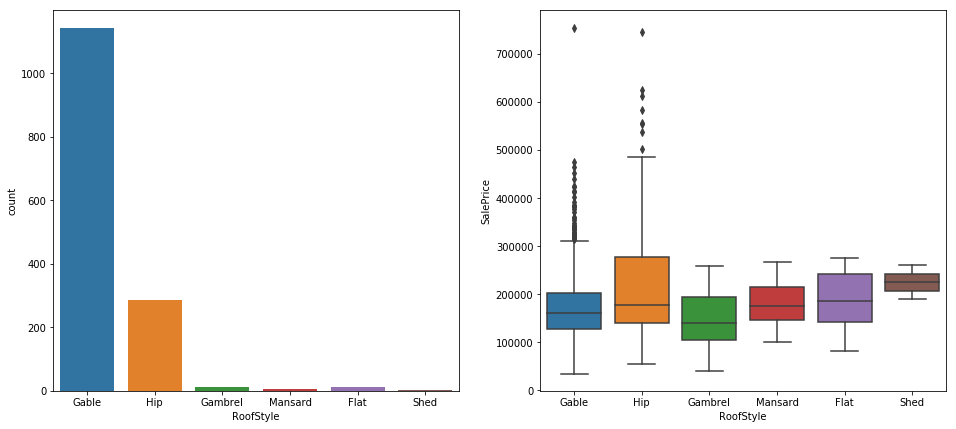

In [36]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['RoofStyle'])
plt.subplot(122)
sns.boxplot(data=houses, x='RoofStyle', y='SalePrice')
plt.show()

<span style='color:green'>RoofStyle doesn't affect SalePrice</span>

### Exterior (Exterior covering on house)

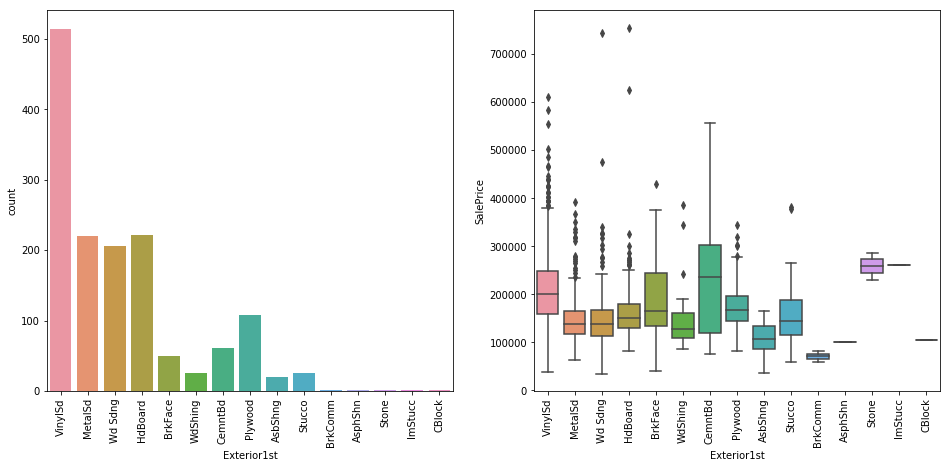

In [37]:
#Exterior1st
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['Exterior1st'])
plt.xticks(rotation=90)
plt.subplot(122)
sns.boxplot(data=houses, x='Exterior1st', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

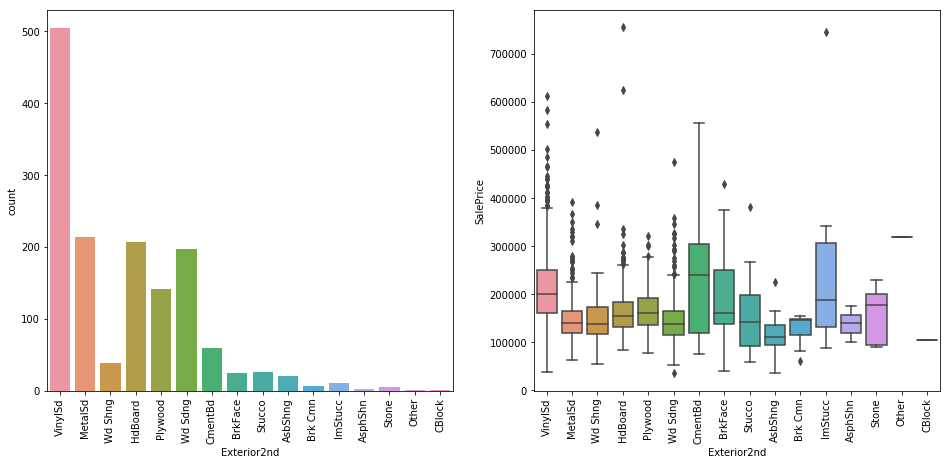

In [38]:
#Exterior2nd
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['Exterior2nd'])
plt.xticks(rotation=90)
plt.subplot(122)
sns.boxplot(data=houses, x='Exterior2nd', y='SalePrice')
plt.xticks(rotation=90)
plt.show()

<span style='color:green'>Exterior1st, Exterior2nd are quite similar</span>

### MasVnrType

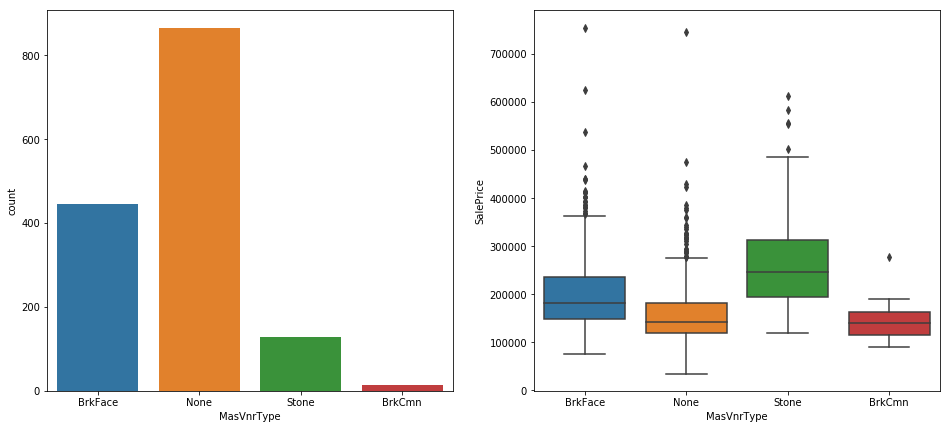

In [39]:
df = houses.copy()
df['MasVnrArea'].fillna('None', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['MasVnrType'])
plt.subplot(122)
sns.boxplot(data=df, x='MasVnrType', y='SalePrice')
plt.show()

### MasVnrArea

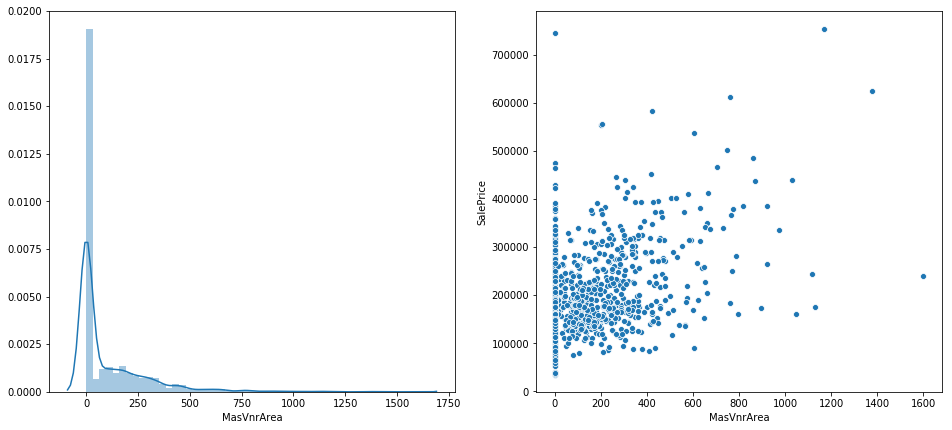

In [40]:
df = houses.copy()
df['MasVnrArea'].fillna(0, inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['MasVnrArea'])
plt.subplot(122)
sns.scatterplot(data=df, x='MasVnrArea', y='SalePrice')
plt.show()

In [41]:
df.loc[:, ['MasVnrArea', 'SalePrice']].corr()

,MasVnrArea,SalePrice
MasVnrArea,1.000000,0.472614
SalePrice,0.472614,1.000000


<span style='color:green'>MasVnrArea has quite strong effect on SalePrice</span>

### ExterQual &  ExterCond (Quality of Exterior material)

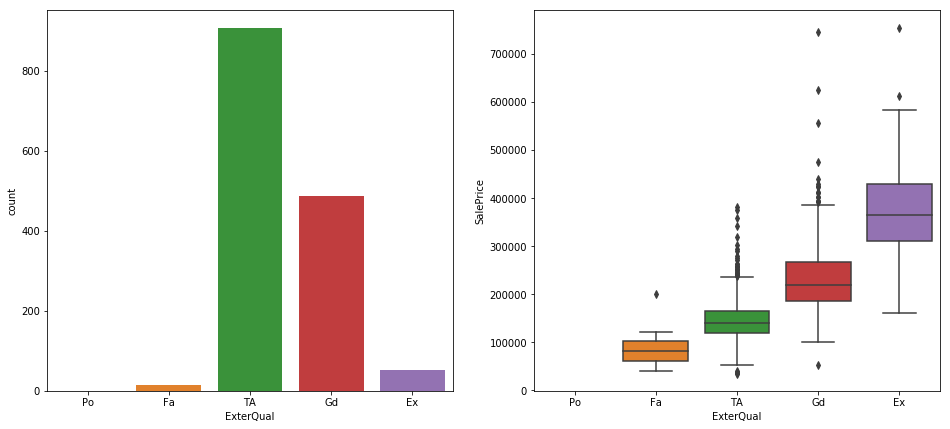

In [42]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['ExterQual'], order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='ExterQual', y='SalePrice', order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

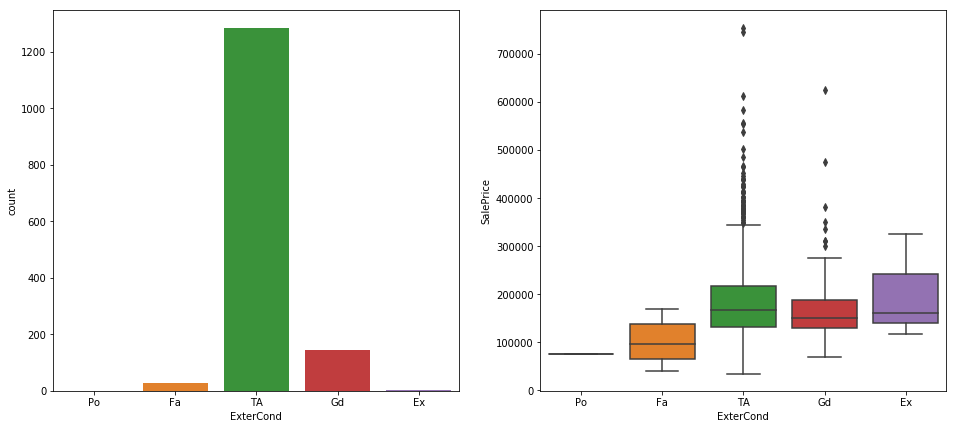

In [43]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['ExterCond'], order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='ExterCond', y='SalePrice', order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

<span style='color:green'>This variable affect SalePrice</span><br>
<span style='color:green'>This variable must has a strong correlation with OverallQual(overall material quality), let's checking their relationship</span><br>

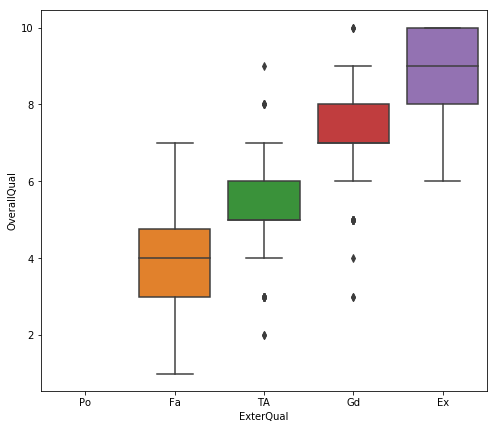

In [44]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=df, x='ExterQual', y='OverallQual', order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

<span style='color:green'>As expected, ExterQual improve OverallQual</span><br>


### Foundation

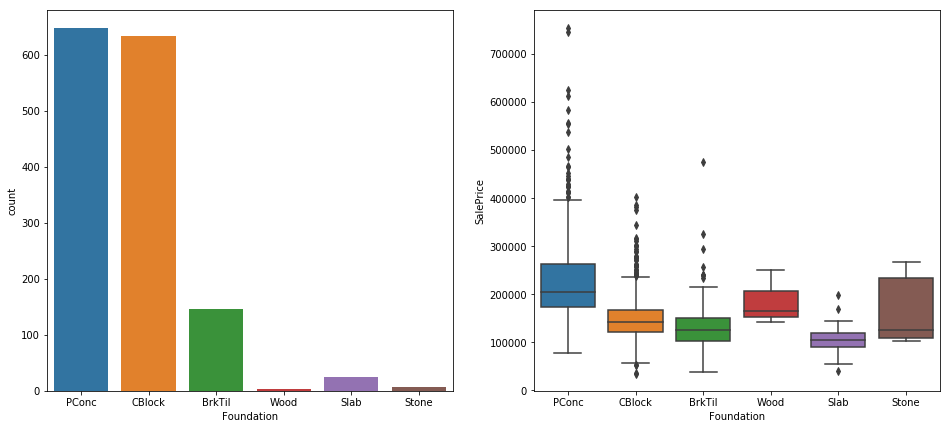

In [45]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['Foundation'])
plt.subplot(122)
sns.boxplot(data=df, x='Foundation', y='SalePrice')
plt.show()

### Utilities

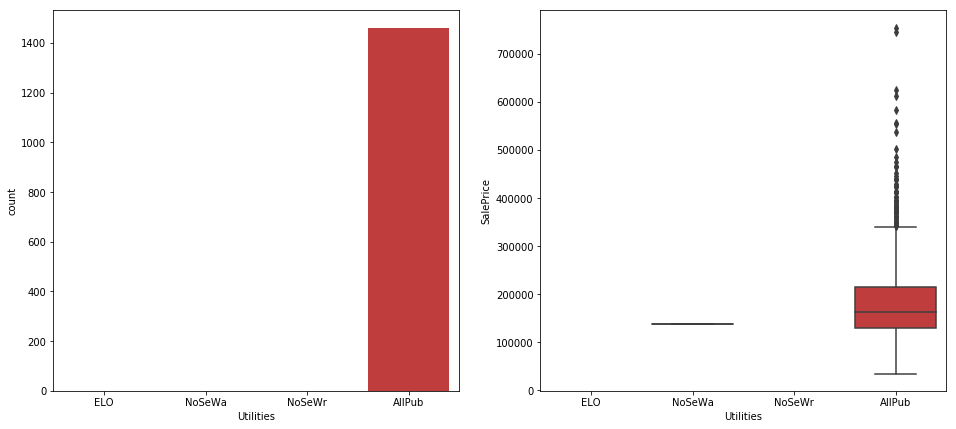

In [46]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(houses['Utilities'], order=['ELO', 'NoSeWa', 'NoSeWr', 'AllPub'])
plt.subplot(122)
sns.boxplot(data=df, x='Utilities', y='SalePrice', order=['ELO', 'NoSeWa', 'NoSeWr', 'AllPub'])
plt.show()

In [47]:
houses['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [48]:
houses.loc[houses['Utilities'] == 'NoSeWa', :]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
944,945,20,RL,NaN,14375,Pave,NaN,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111,Rec,354,354,819,GasA,Gd,Y,FuseA,1344,0,0,1344,0,1,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2,525,TA,TA,Y,0,118,0,0,233,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


<span style='color:green'>All houses have all utitlities</span>

### BsmtQual

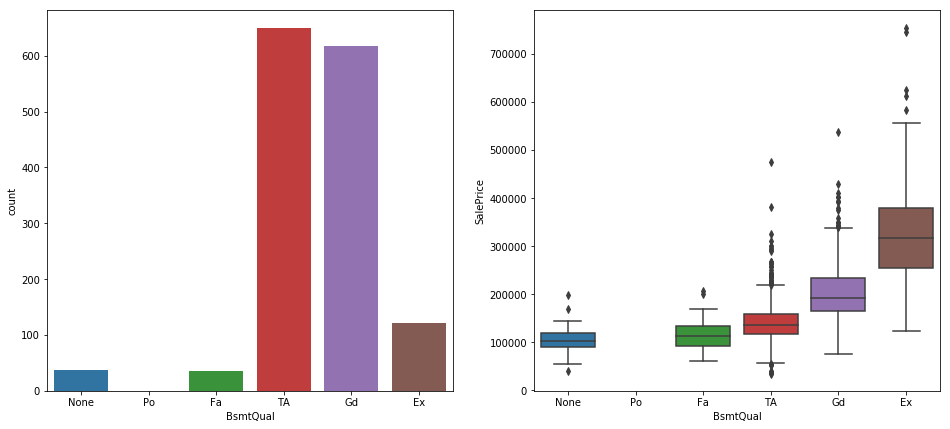

In [49]:
df = houses.copy()
df['BsmtQual'].fillna('None', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['BsmtQual'], order=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='BsmtQual', y='SalePrice', order=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

### BsmtCond

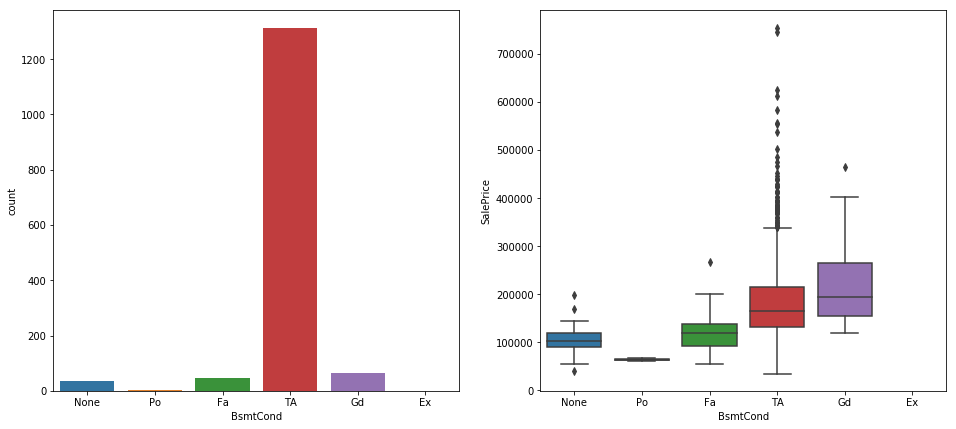

In [50]:
df = houses.copy()
df['BsmtCond'].fillna('None', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['BsmtCond'], order=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='BsmtCond', y='SalePrice', order=['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

### BsmtExposure

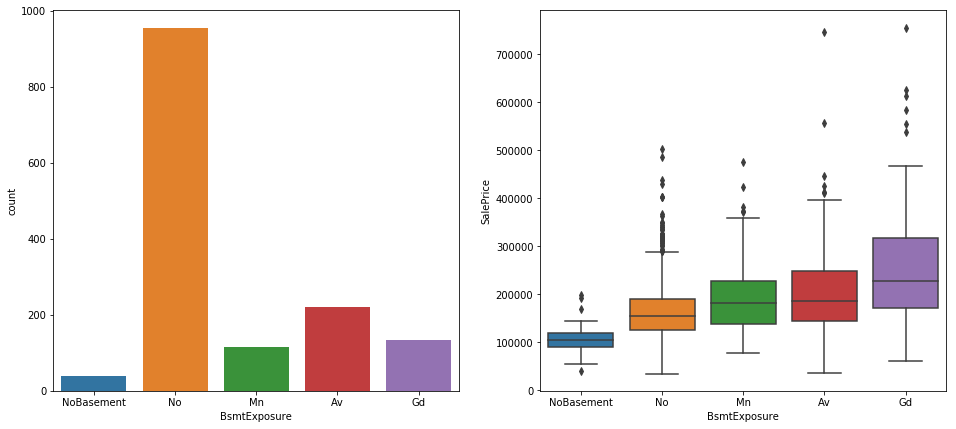

In [51]:
df = houses.copy()
df['BsmtExposure'].fillna('NoBasement', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['BsmtExposure'], order=['NoBasement', 'No', 'Mn', 'Av', 'Gd'])
plt.subplot(122)
sns.boxplot(data=df, x='BsmtExposure', y='SalePrice',order=['NoBasement', 'No', 'Mn', 'Av', 'Gd'])
plt.show()

### BsmtFinSF1

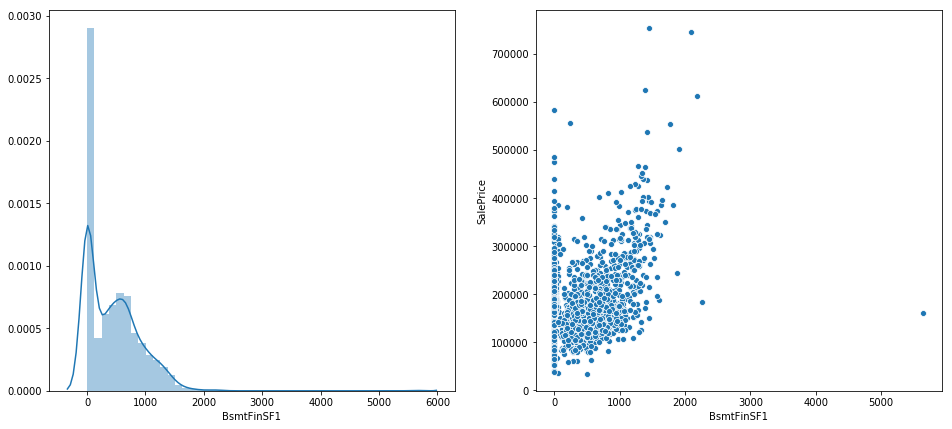

In [52]:
df = houses.copy()
df['BsmtFinSF1'].fillna('NoBasement', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['BsmtFinSF1'])
plt.subplot(122)
sns.scatterplot(data=df, x='BsmtFinSF1', y='SalePrice')
plt.show()

In [53]:
houses.loc[:, ['BsmtFinSF1', 'SalePrice']].corr()

,BsmtFinSF1,SalePrice
BsmtFinSF1,1.00000,0.38642
SalePrice,0.38642,1.00000


### BsmtUnfSF

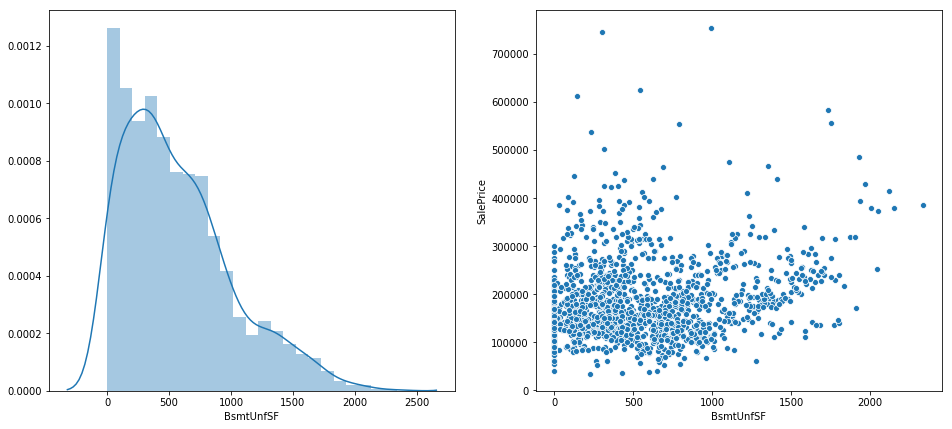

In [54]:
df = houses.copy()
df['BsmtUnfSF'].fillna(0, inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['BsmtUnfSF'])
plt.subplot(122)
sns.scatterplot(data=df, x='BsmtUnfSF', y='SalePrice')
plt.show()

In [55]:
houses.loc[:, ['BsmtUnfSF', 'SalePrice']].corr()

,BsmtUnfSF,SalePrice
BsmtUnfSF,1.000000,0.214479
SalePrice,0.214479,1.000000


### TotalBsmtSF

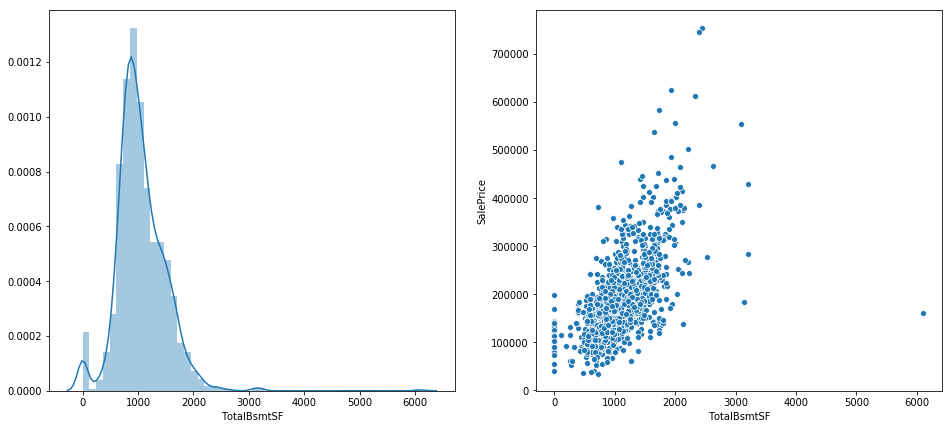

In [56]:
df = houses.copy()
df['TotalBsmtSF'].fillna(0, inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['TotalBsmtSF'])
plt.subplot(122)
sns.scatterplot(data=df, x='TotalBsmtSF', y='SalePrice')
plt.show()

In [57]:
houses.loc[:, ['TotalBsmtSF', 'SalePrice']].corr()

,TotalBsmtSF,SalePrice
TotalBsmtSF,1.000000,0.613581
SalePrice,0.613581,1.000000


### Heating

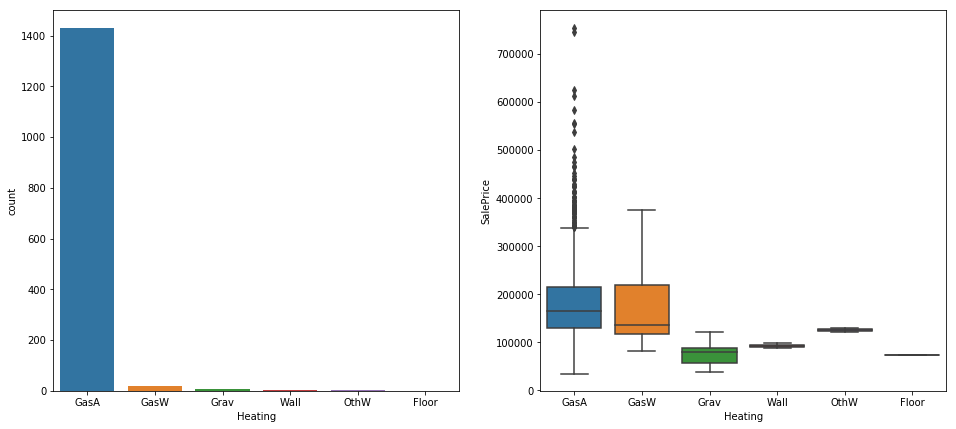

In [58]:
df = houses.copy()
df['Heating'].fillna('NoHeating', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['Heating'])
plt.subplot(122)
sns.boxplot(data=df, x='Heating', y='SalePrice')
plt.show()

### HeatingQC

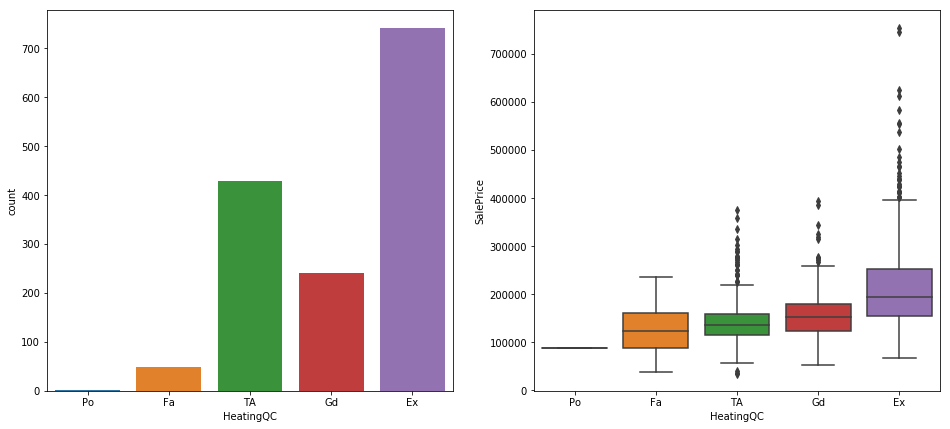

In [59]:
df = houses.copy()
df['HeatingQC'].fillna('NoHeating', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['HeatingQC'], order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='HeatingQC', y='SalePrice', order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

### CentralAir

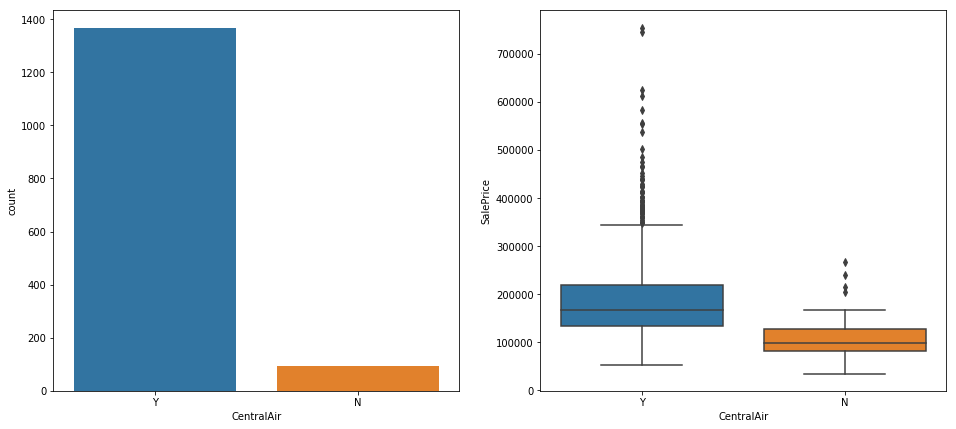

In [60]:
df = houses.copy()
df['CentralAir'].fillna('NA', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['CentralAir'])
plt.subplot(122)
sns.boxplot(data=df, x='CentralAir', y='SalePrice')
plt.show()

### Electrical

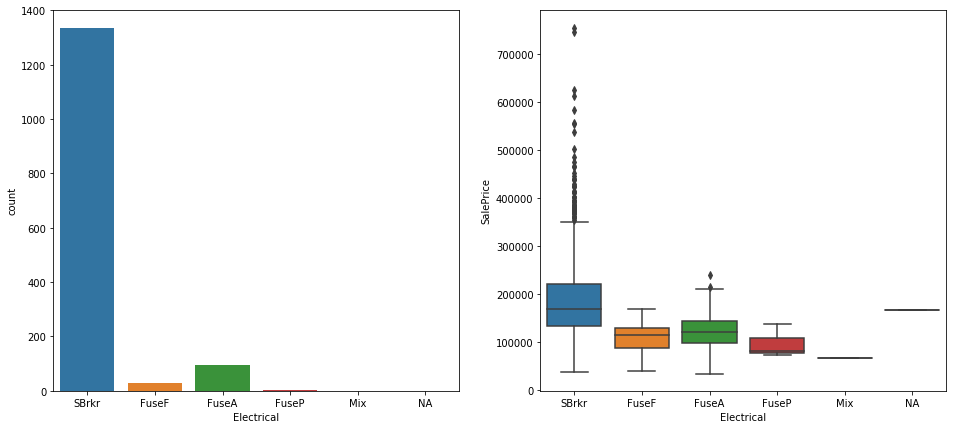

In [61]:
df = houses.copy()
df['Electrical'].fillna('NA', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['Electrical'])
plt.subplot(122)
sns.boxplot(data=df, x='Electrical', y='SalePrice')
plt.show()

### 1stFlrSF & 2ndFlrSF

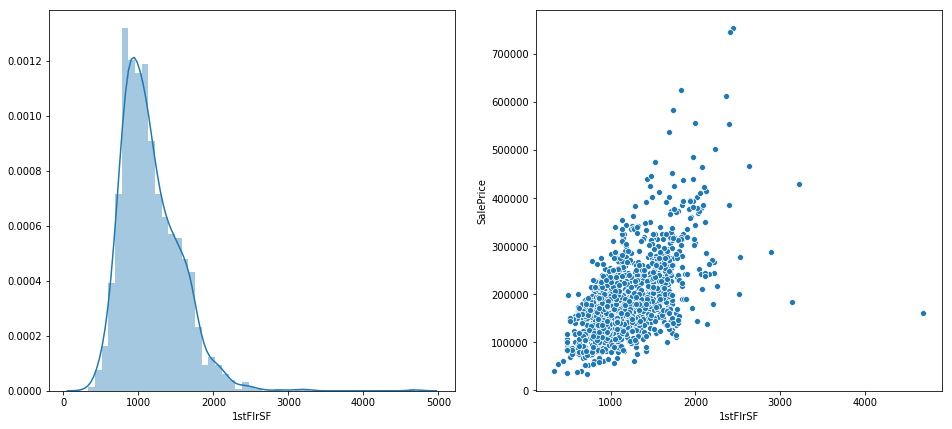

In [62]:
df = houses.copy()
df['1stFlrSF'].fillna(0, inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['1stFlrSF'])
plt.subplot(122)
sns.scatterplot(data=df, x='1stFlrSF', y='SalePrice')
plt.show()

In [63]:
houses.loc[:, ['1stFlrSF', 'SalePrice']].corr()

,1stFlrSF,SalePrice
1stFlrSF,1.000000,0.605852
SalePrice,0.605852,1.000000


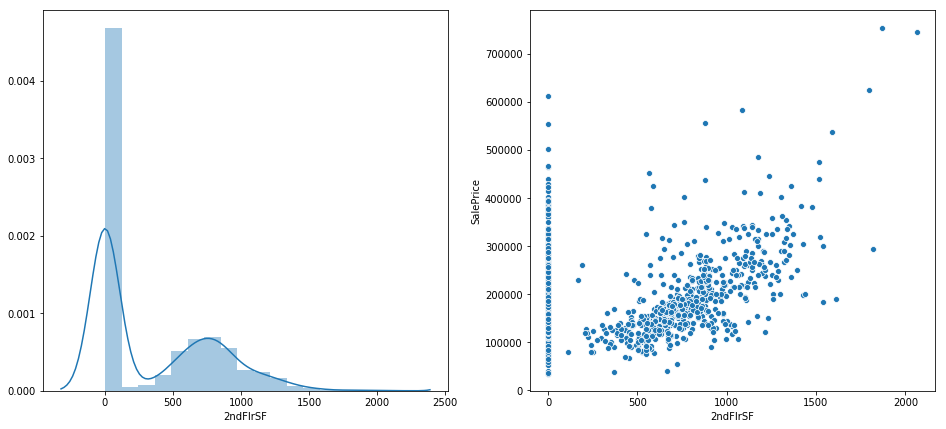

In [64]:
df = houses.copy()
df['2ndFlrSF'].fillna(0, inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['2ndFlrSF'])
plt.subplot(122)
sns.scatterplot(data=df, x='2ndFlrSF', y='SalePrice')
plt.show()

In [65]:
df.loc[:, ['2ndFlrSF', 'SalePrice']].corr()

,2ndFlrSF,SalePrice
2ndFlrSF,1.000000,0.319334
SalePrice,0.319334,1.000000


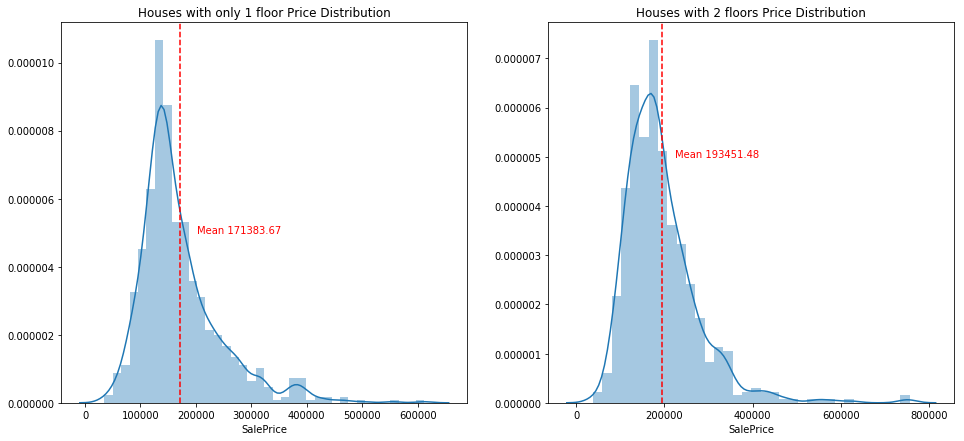

In [66]:
oneFlrHouses = df.loc[df['2ndFlrSF'] == 0, :]
twoFlrHouses = df.loc[df['2ndFlrSF'] > 0, :]
mean1 = oneFlrHouses['SalePrice'].mean()
mean2 = twoFlrHouses['SalePrice'].mean()

plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(oneFlrHouses['SalePrice'])
plt.gca().axvline(mean1, color='r' , linestyle='--')
plt.text(x=mean1 + 30000,y= 0.000005, s=f'Mean {mean1:.2f}', color='r')
plt.title("Houses with only 1 floor Price Distribution")
plt.subplot(122)
sns.distplot(twoFlrHouses['SalePrice'])
plt.gca().axvline(mean2, color='r', linestyle='--')
plt.text(x=mean2 + 30000,y= 0.000005, s=f'Mean {mean2:.2f}', color='r')
plt.title("Houses with 2 floors Price Distribution")
plt.show()

### GrLivArea

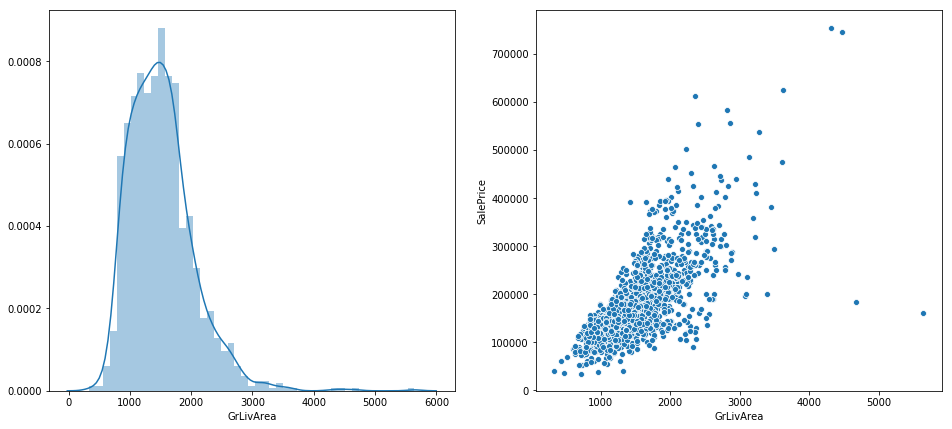

In [67]:
df = houses.copy()
df['GrLivArea'].fillna(0, inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['GrLivArea'])
plt.subplot(122)
sns.scatterplot(data=df, x='GrLivArea', y='SalePrice')
plt.show()

In [68]:
df.loc[:, ['GrLivArea', 'SalePrice']].corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


### GrLivArea vs TotalFlrSF

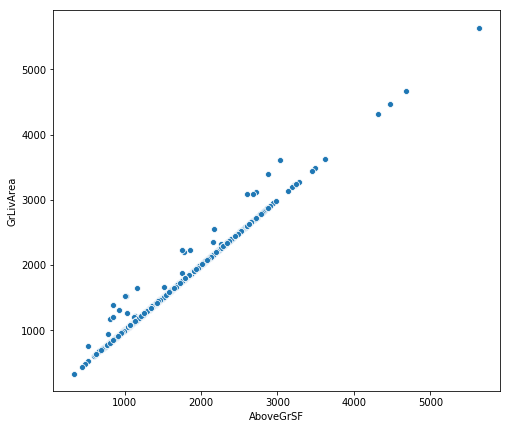

In [69]:
df = houses.copy()
df['AboveGrSF'] = df['1stFlrSF'] + df['2ndFlrSF']

df['GrLivArea'].fillna(0, inplace=True)
df['AboveGrSF'].fillna(0, inplace=True)


plt.figure(figsize=(8, 7))
sns.scatterplot(data=df, x='AboveGrSF', y='GrLivArea')
plt.show()

In [70]:
df.loc[:, ['GrLivArea', 'totalFlrSF']].corr()

,GrLivArea,totalFlrSF
GrLivArea,1.0,NaN
totalFlrSF,NaN,NaN


<span style='color:red'>**AboveGrSF and GrLivArea are super highly corelated**</span><br>
<span style='color:red'>**Ignore AboveGrSF**</span>

### FullBath & BsmtFullBath & BsmtHalfBath & HalfBath

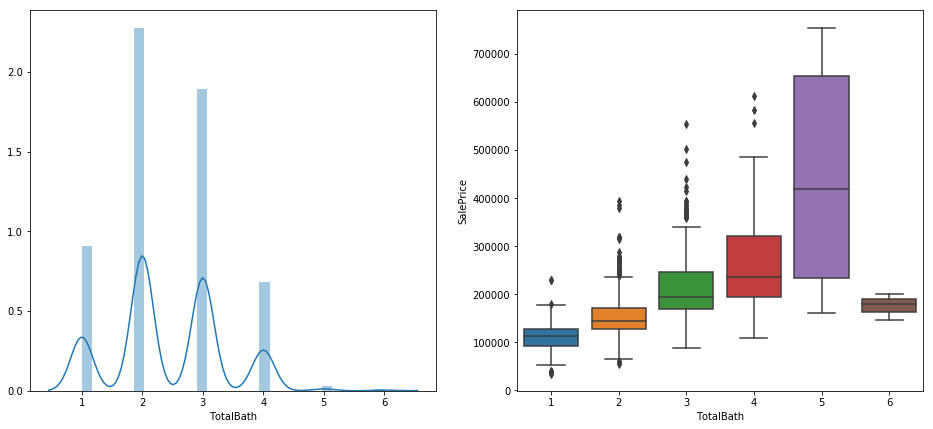

In [71]:
df = houses.copy()
df['TotalBath'] = df['FullBath'] + df['BsmtFullBath'] + df['BsmtHalfBath'] +df['HalfBath']

plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['TotalBath'])
plt.subplot(122)
sns.boxplot(data=df, x='TotalBath', y='SalePrice')
plt.show()

<span style='color:green'>The more TotalBath the more SalePrice</span>

### BedroomAbvGr

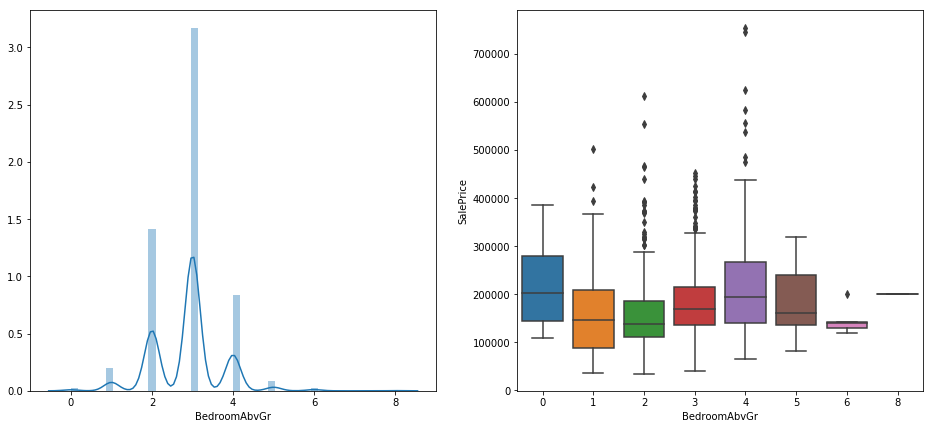

In [72]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['BedroomAbvGr'])
plt.subplot(122)
sns.boxplot(data=df, x='BedroomAbvGr', y='SalePrice')
plt.show()

<span style='color:green'>Houses withc 0 bedroom are fishy, must be something wrong about them</span><br>
<span style='color:red'>**Investigate on houses with 0 bedroom**</span><br>

###  Kitchen & KitchenQual

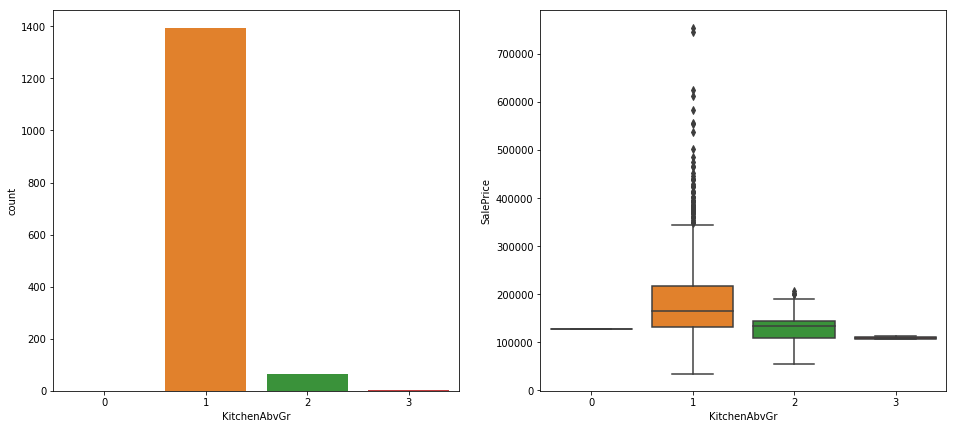

In [73]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['KitchenAbvGr'])
plt.subplot(122)
sns.boxplot(data=df, x='KitchenAbvGr', y='SalePrice')
plt.show()

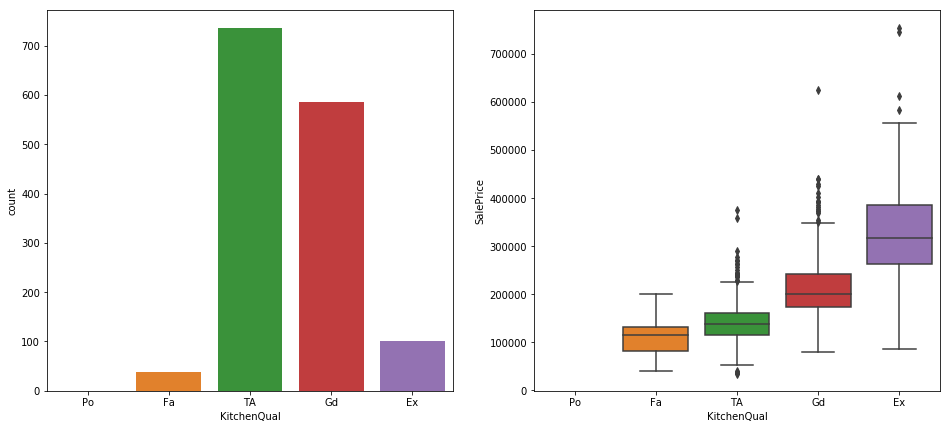

In [74]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['KitchenQual'], order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='KitchenQual', y='SalePrice', order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

### TotRmsAbvGrd

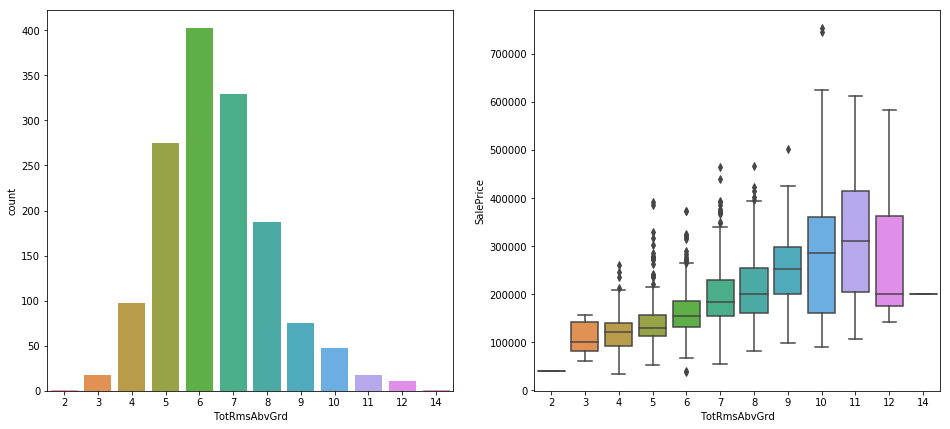

In [75]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['TotRmsAbvGrd'])
plt.subplot(122)
sns.boxplot(data=df, x='TotRmsAbvGrd', y='SalePrice')
plt.show()

### FirePlace & FireplaceQu

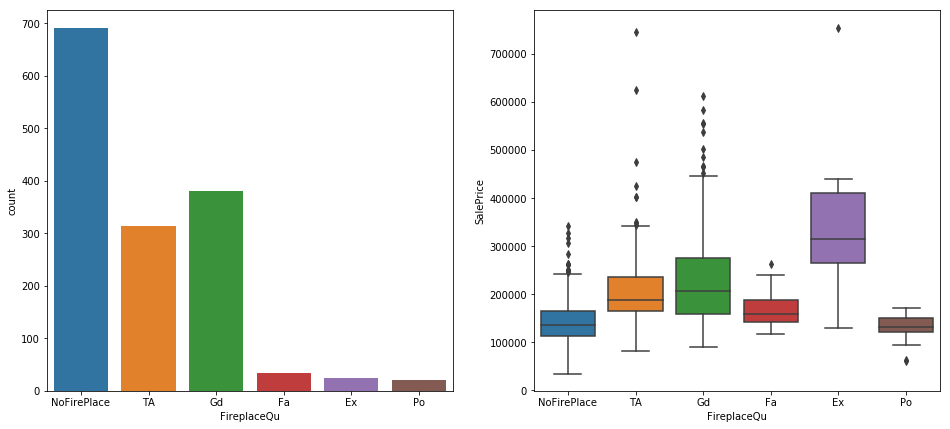

In [76]:
df = houses.copy()
df['FireplaceQu'].fillna('NoFirePlace', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['FireplaceQu'])
plt.subplot(122)
sns.boxplot(data=df, x='FireplaceQu', y='SalePrice')
plt.show()

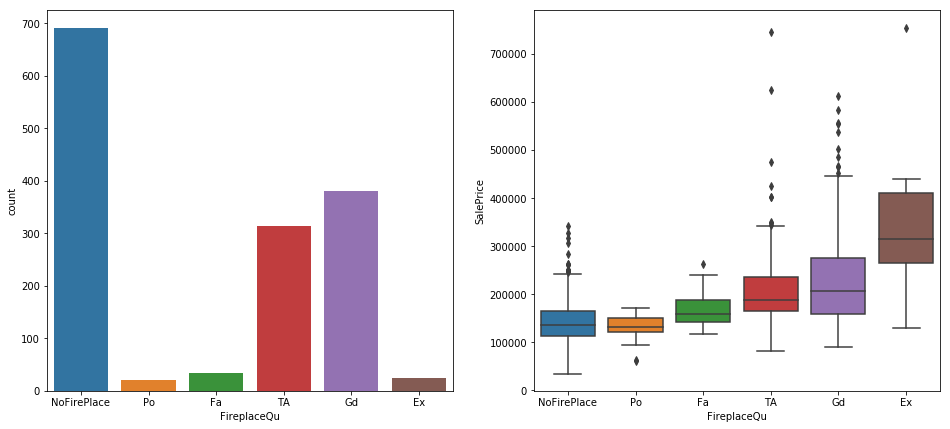

In [77]:
df['FireplaceQu'].fillna(0, inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['FireplaceQu'], order=['NoFirePlace','Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='FireplaceQu', y='SalePrice', order=['NoFirePlace', 'Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

### GarageType

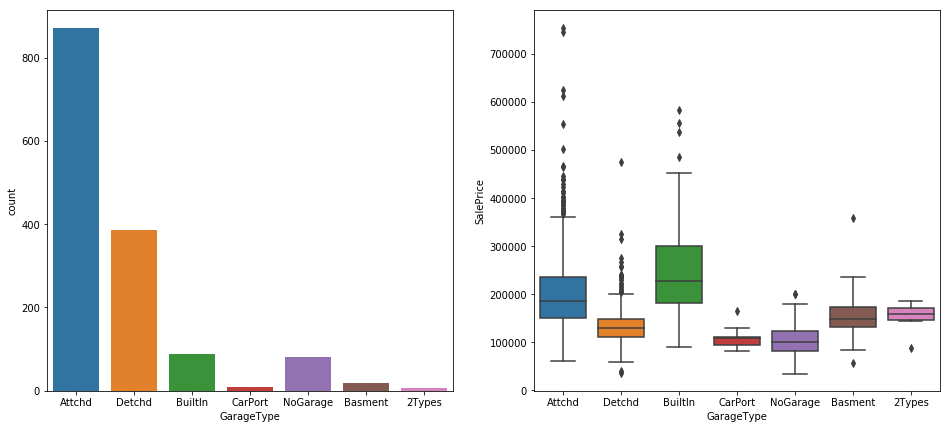

In [78]:
df = houses.copy()
df['GarageType'].fillna('NoGarage', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['GarageType'])
plt.subplot(122)
sns.boxplot(data=df, x='GarageType', y='SalePrice')
plt.show()

### GarageYrBlt

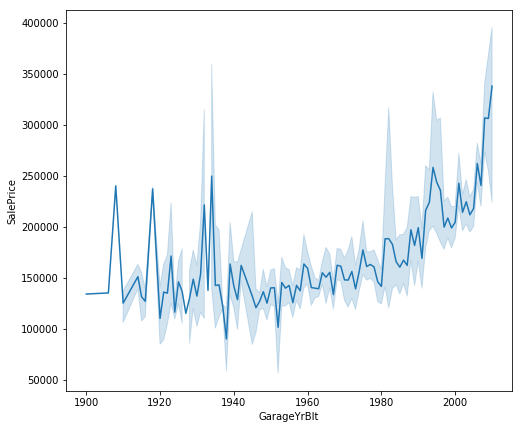

In [79]:
plt.figure(figsize=(8, 7))
sns.lineplot(df['GarageYrBlt'], df['SalePrice'])
plt.show()

### GarageYrBlt vs YearBuilt

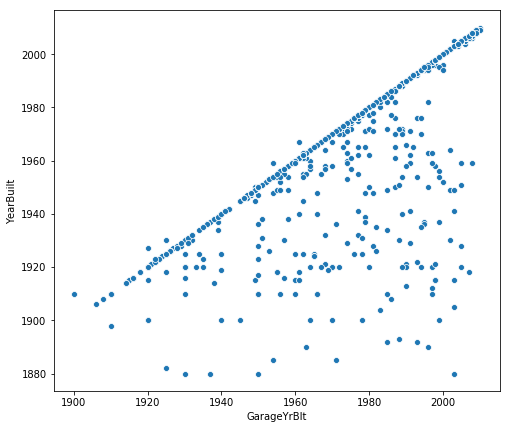

In [80]:
plt.figure(figsize=(8,7))
sns.scatterplot(houses['GarageYrBlt'], houses['YearBuilt'])
plt.show()

<span style='color:green'>Some Garage were built after</span>

In [81]:
houses.loc[:, ['GarageYrBlt','YearBuilt']].corr()

,GarageYrBlt,YearBuilt
GarageYrBlt,1.000000,0.825667
YearBuilt,0.825667,1.000000


### GarageFinish

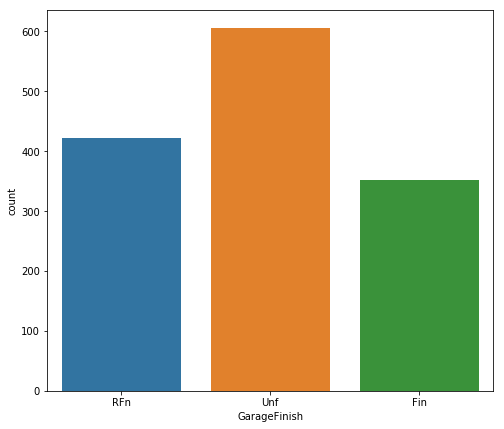

In [82]:
plt.figure(figsize=(8,7))
sns.countplot(houses['GarageFinish'])
plt.show()

### GarageCars & GarageArea

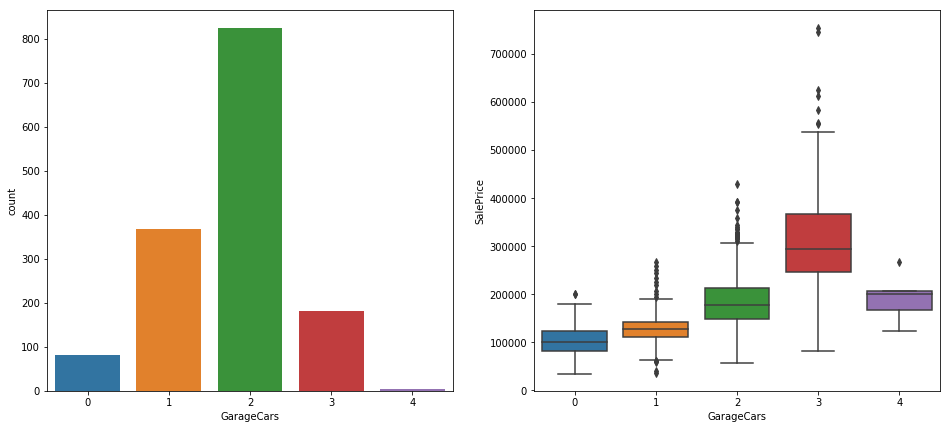

In [83]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['GarageCars'])
plt.subplot(122)
sns.boxplot(data=df, x='GarageCars', y='SalePrice')
plt.show()

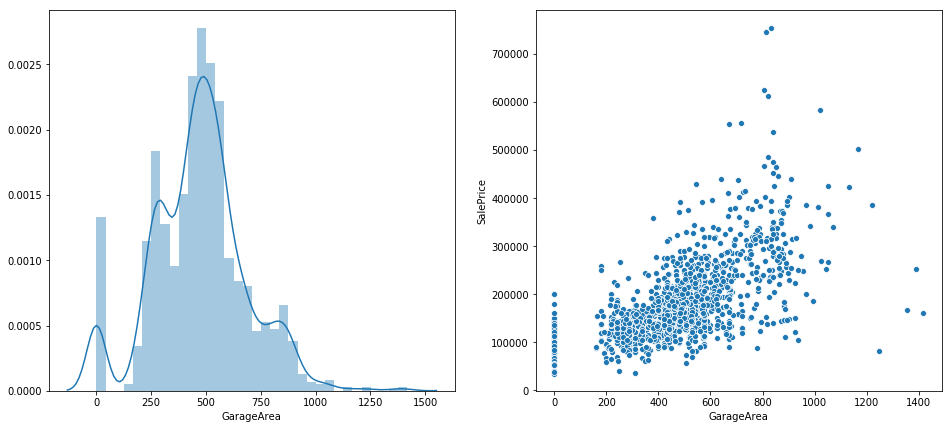

In [84]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(df['GarageArea'])
plt.subplot(122)
sns.scatterplot(data=df, x='GarageArea', y='SalePrice')
plt.show()

In [85]:
houses.loc[:, ['GarageArea', 'SalePrice']].corr()

,GarageArea,SalePrice
GarageArea,1.000000,0.623431
SalePrice,0.623431,1.000000


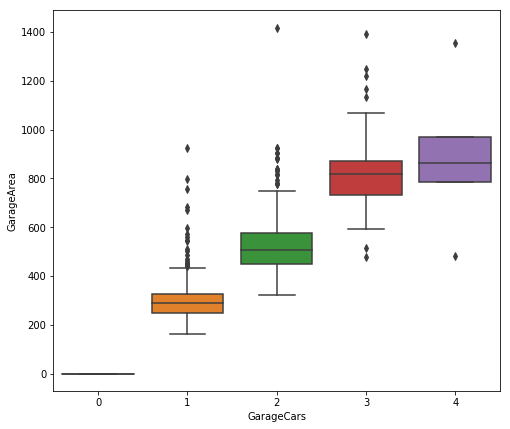

In [86]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=df, x='GarageCars', y='GarageArea')
plt.show()

<span style='color:green'>They are highly correlated</span><br>
<span style='color:red'>**Choose one**</span><br>


### GarageQual

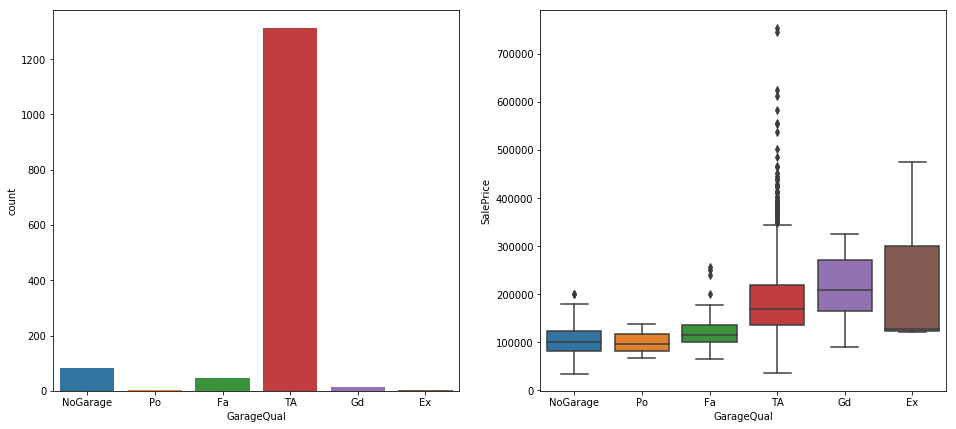

In [87]:
df = houses.copy()
df['GarageQual'].fillna('NoGarage', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['GarageQual'], order=['NoGarage','Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='GarageQual', y='SalePrice', order=['NoGarage','Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

### GarageCond

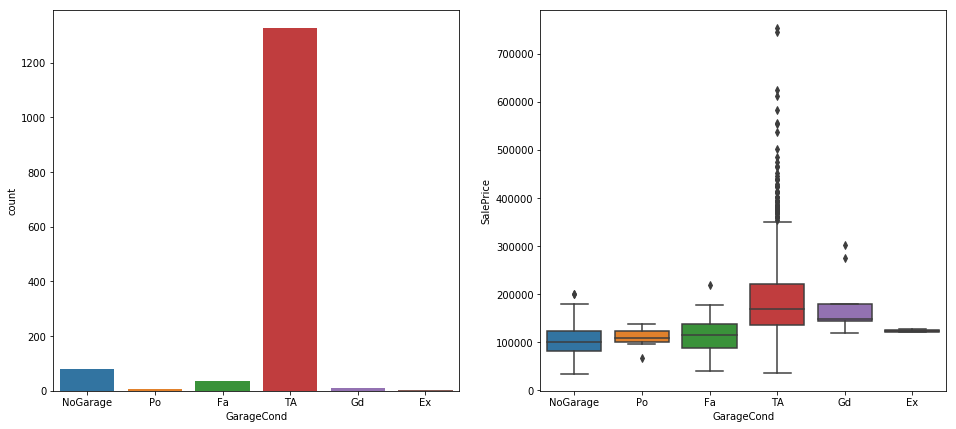

In [88]:
df = houses.copy()
df['GarageCond'].fillna('NoGarage', inplace=True)
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['GarageCond'], order=['NoGarage','Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.subplot(122)
sns.boxplot(data=df, x='GarageCond', y='SalePrice', order=['NoGarage','Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

### PavedDrive

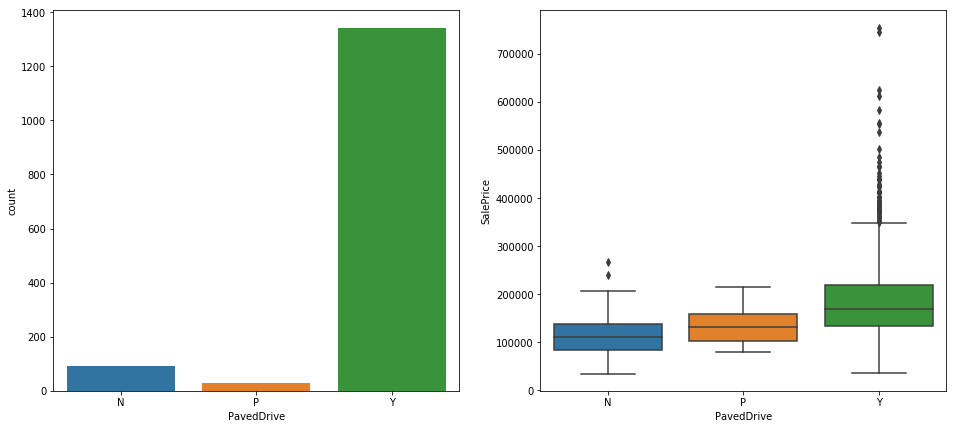

In [89]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['PavedDrive'], order=['N','P', 'Y'])
plt.subplot(122)
sns.boxplot(data=df, x='PavedDrive', y='SalePrice', order=['N','P', 'Y'])
plt.show()

### WoodDeckSF

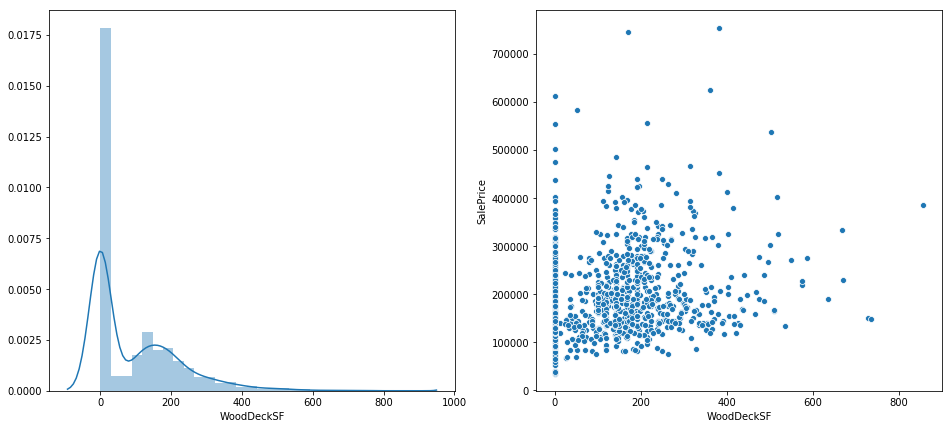

In [90]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.distplot(houses['WoodDeckSF'])
plt.subplot(122)
sns.scatterplot(data=houses, x='WoodDeckSF', y='SalePrice')
plt.show()

In [91]:
houses.loc[:, ['WoodDeckSF', 'SalePrice']].corr()

,WoodDeckSF,SalePrice
WoodDeckSF,1.000000,0.324413
SalePrice,0.324413,1.000000


### PoolArea

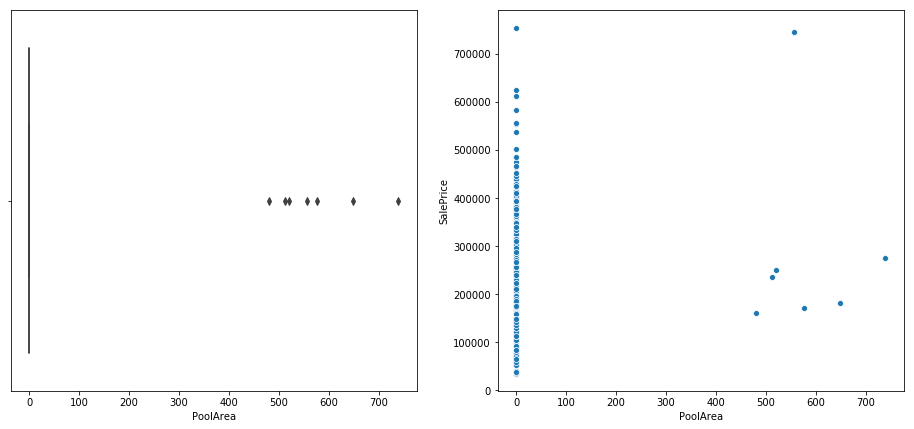

In [92]:
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.boxplot(houses['PoolArea'])
plt.subplot(122)
sns.scatterplot(data=houses, x='PoolArea', y='SalePrice')
plt.show()

### MiscFeature

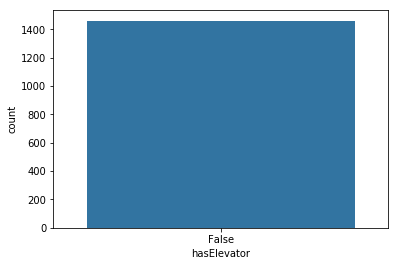

In [93]:
df = houses.copy()

#Any houses has an Elevator?
df['hasElevator'] = df['MiscFeature'] == 'Elev'
sns.countplot(df['hasElevator'])
plt.show()

In [94]:
df['hasElevator'].unique()

array([False])

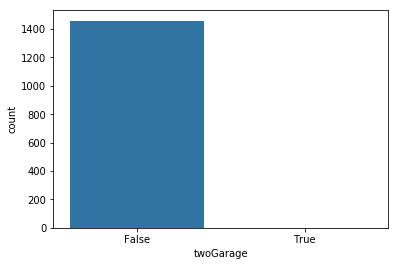

In [95]:
#Any houses has 2 garages?
df['twoGarage'] = df['MiscFeature'] == 'Gar2'
sns.countplot(df['twoGarage'])
plt.show()

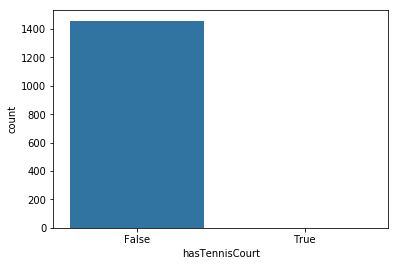

In [96]:
#Any houses has tennis court?

df['hasTennisCourt'] = df['MiscFeature'] == 'TenC'
sns.countplot(df['hasTennisCourt'])
plt.show()

In [97]:
df.loc[(df['hasTennisCourt'] == True), ['SalePrice']]

,SalePrice
1386,250000


### MoSold

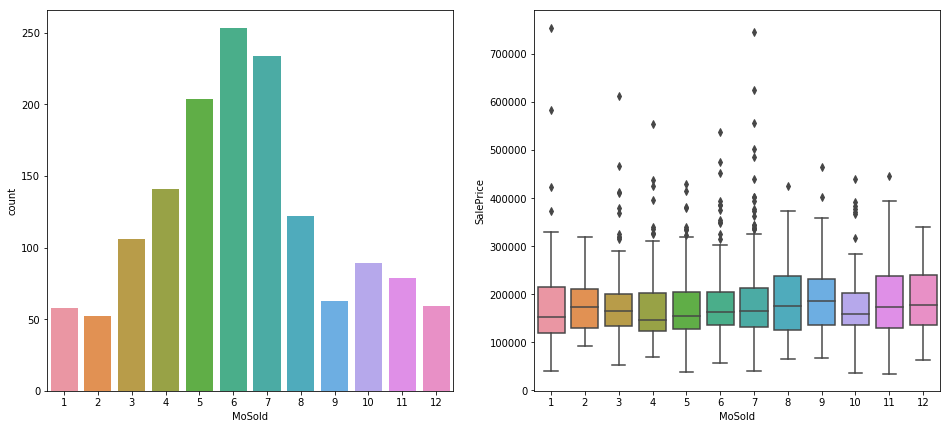

In [98]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['MoSold'])
plt.subplot(122)
sns.boxplot(data=df, x='MoSold', y='SalePrice')
plt.show()

<span style='color:green'>Sold Mounth doesn't affect SalePrice</span>

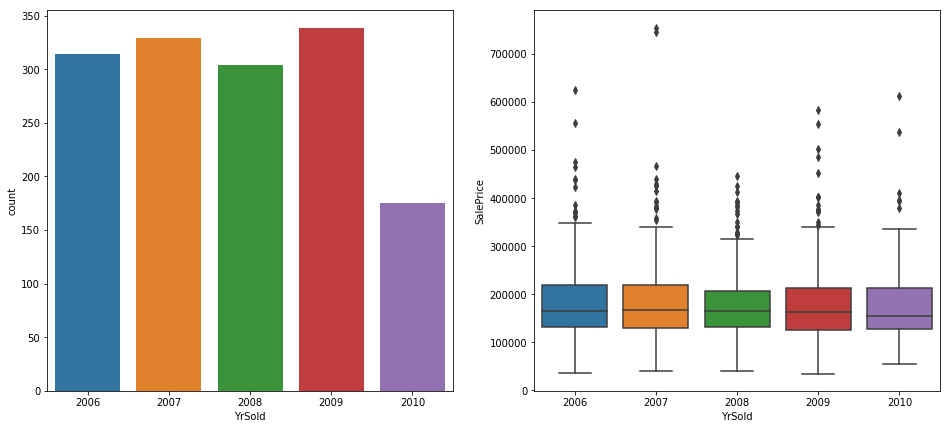

In [99]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['YrSold'])
plt.subplot(122)
sns.boxplot(data=df, x='YrSold', y='SalePrice')
plt.show()

In [100]:
houses['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

### YrSold vs YearBuilt

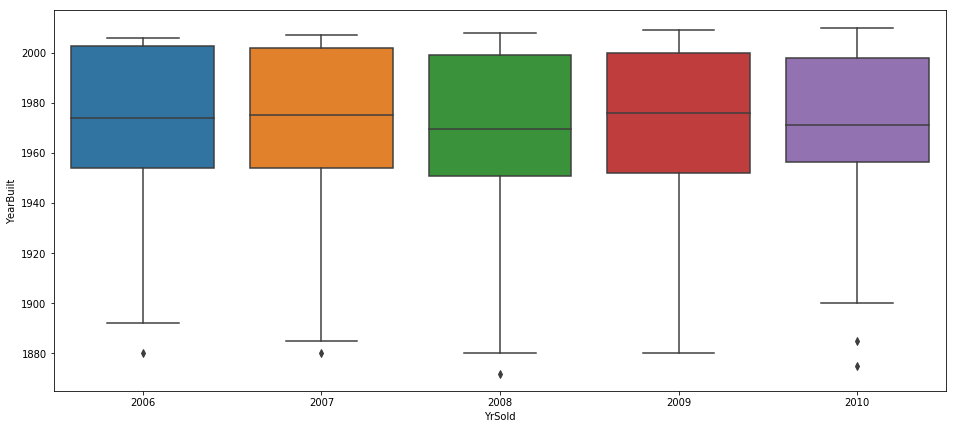

In [101]:
df = houses.copy()
plt.figure(figsize=(16, 7))
sns.boxplot(df['YrSold'], df['YearBuilt'])
plt.show()

In [102]:
houses['YrSold'].shape

(1460,)

<span style='color:green'>This dataset contains houses tht were sold during 2006 - 2010. so from the previous plot between YearbBuilt and Price do really tells us that **houses that were built in lately years tend to be more expensive**</span>

### SaleType

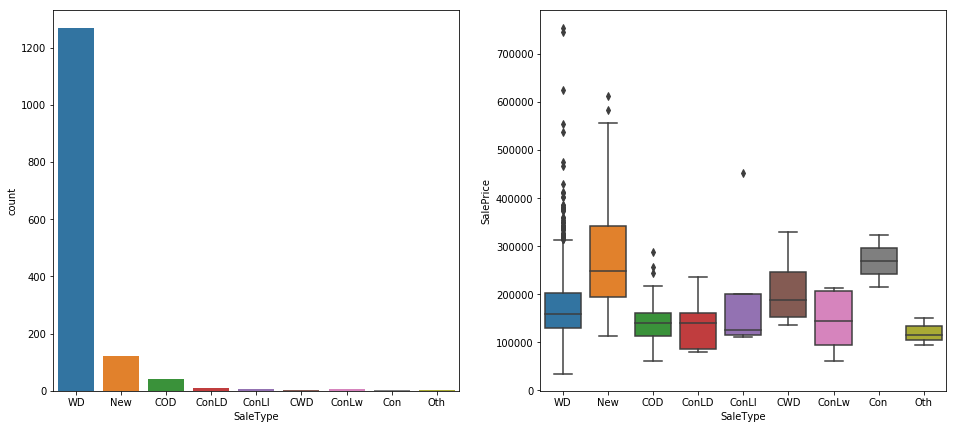

In [103]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['SaleType'])
plt.subplot(122)
sns.boxplot(data=df, x='SaleType', y='SalePrice')
plt.show()

### SaleCondition

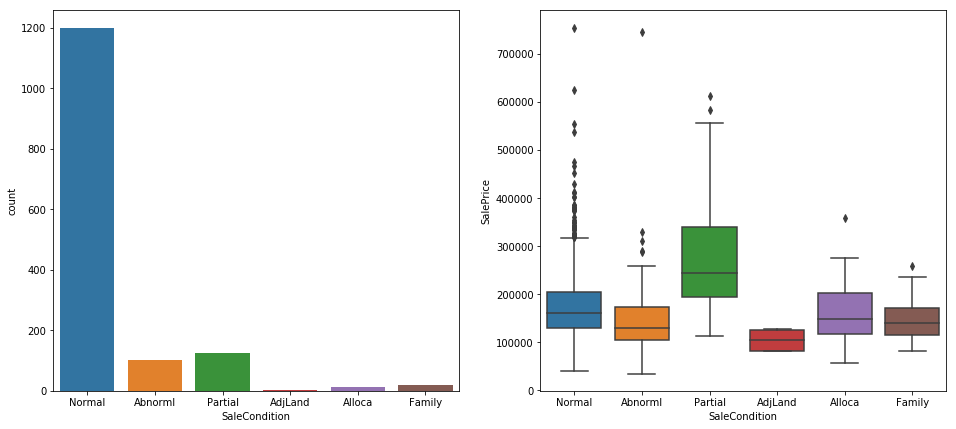

In [104]:
df = houses.copy()
plt.figure(figsize=(16, 7))
plt.subplot(121)
sns.countplot(df['SaleCondition'])
plt.subplot(122)
sns.boxplot(data=df, x='SaleCondition', y='SalePrice')
plt.show()

### Handle categorical features that appear in numerical form

In [105]:
#transform MSSubClass into string
houses['MSSubClass'] = houses['MSSubClass'].apply(str)

### Do XXXQual features affect OverallQual?

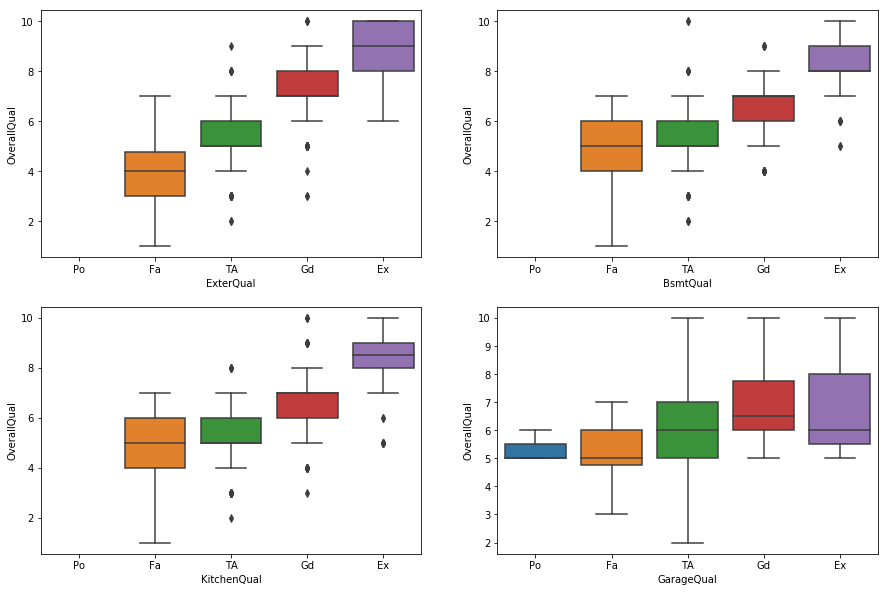

In [106]:
df = houses.copy()
qualFeatures = [c for c in df.columns if c.endswith('Qual') & (c != 'OverallQual')]
#df[qualFeatures].fillna('None', inplace=True)

n_col = 2
n_row = np.ceil(len(qualFeatures) / n_col)

plt.figure(figsize=(15, 10))
for index, value in enumerate(qualFeatures):
    plt.subplot(n_row,n_col,index+1)
    sns.boxplot(data=df, x=value, y='OverallQual', order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

They do.

### Do XXXCond features affect OverallCond ?

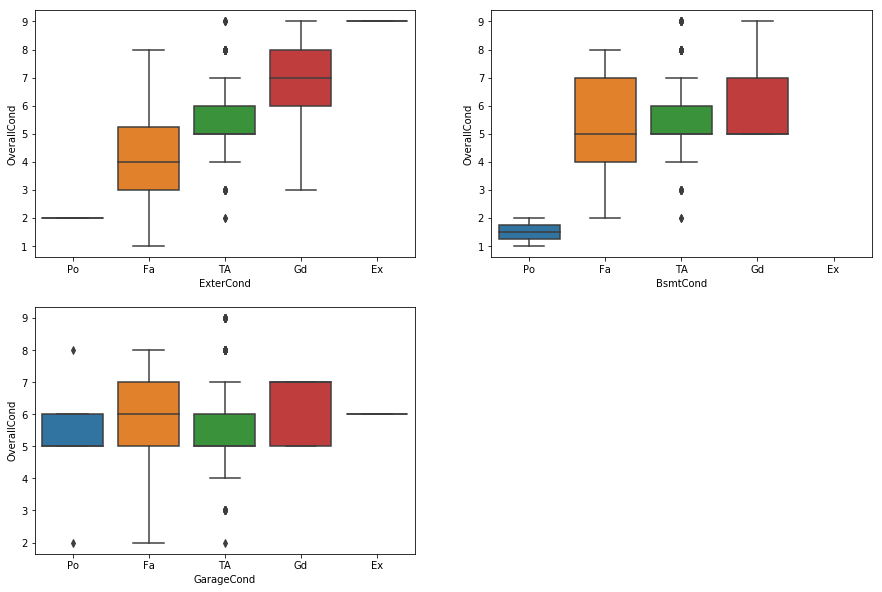

In [107]:
condFeatures = [c for c in houses.columns if c.endswith('Cond') & (c != 'OverallCond')]

n_col = 2
n_row = int(np.ceil(len(condFeatures) / n_col))

plt.figure(figsize=(15, 10))
for index, value in enumerate(condFeatures):
    plt.subplot(n_row, n_col, index+1)
    sns.boxplot(data=houses, x=value, y='OverallCond', order=['Po', 'Fa', 'TA', 'Gd', 'Ex'])
plt.show()

Some of them do, some don't

### Let's check correlations between all numerical features

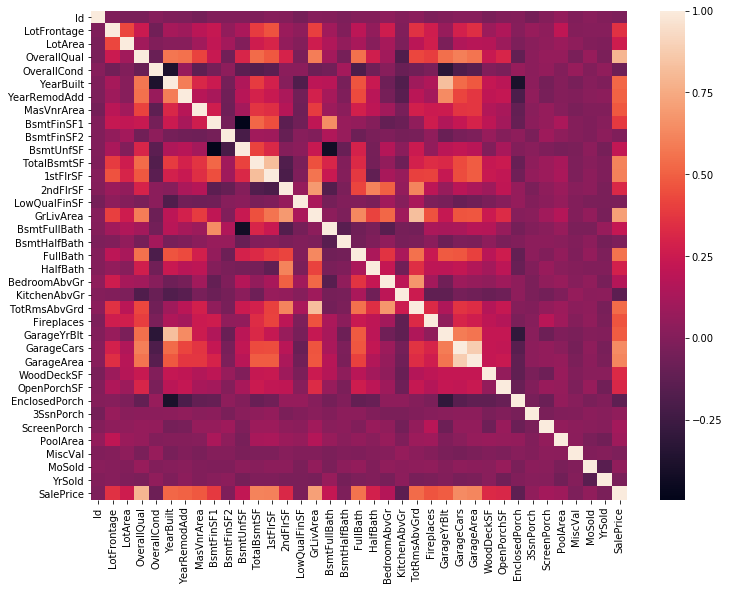

In [108]:
plt.figure(figsize=(12, 9))
sns.heatmap(houses.corr())
plt.show()

with this heatmap we can discard features that are highly correlated to each other

### OverallCond vs YearBuilt

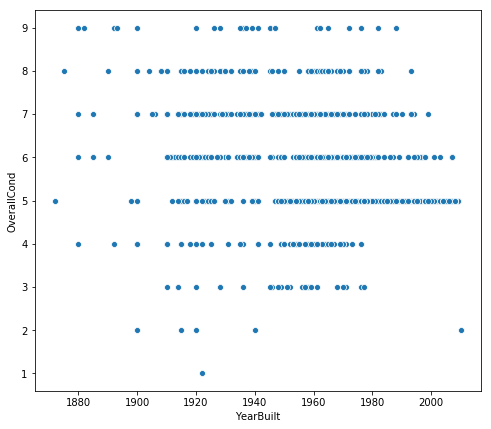

In [109]:
plt.figure(figsize=(8, 7))
sns.scatterplot(houses['YearBuilt'], houses['OverallCond'])
plt.show()

In [110]:
houses.loc[:, ['OverallCond', 'YearBuilt']].corr()

,OverallCond,YearBuilt
OverallCond,1.000000,-0.375983
YearBuilt,-0.375983,1.000000


### TotalBsmtSF vs. 1stFlrSF

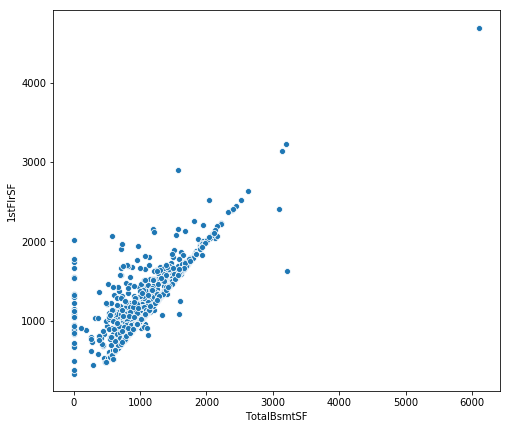

In [111]:
plt.figure(figsize=(8, 7))
sns.scatterplot(houses['TotalBsmtSF'], houses['1stFlrSF'])
plt.show()

In [112]:
houses.loc[:, ['TotalBsmtSF', '1stFlrSF']].corr()

,TotalBsmtSF,1stFlrSF
TotalBsmtSF,1.00000,0.81953
1stFlrSF,0.81953,1.00000


They are highly correlated <br>
<span style='color:red'>**drop 1stFlrSF because it provide same information as TotalAbgSF**</span><br>
<span style='color:red'>**create new feature indicate TotalSpaceSF (TotalBsmtSF + GrLivArea)**</span>

### TotRmsAbvGrd vs. GrLiveArea

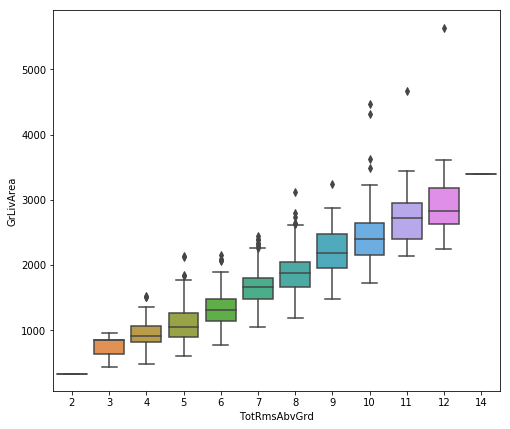

In [113]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=houses, x='TotRmsAbvGrd', y='GrLivArea')
plt.show()

<span style='color:red'>Theses features are highly correlated bu we will not discard one of them because as I talk to the domain expert she confirms that these features give a different information</span>

### Transformer to handle missing values

In [114]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from scipy import stats

class AttributeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes]

class MissingDummyAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        na_bools = X.isna().any()
        na_columns = na_bools[na_bools].index.values
        result = pd.DataFrame()
        for i, column in enumerate(na_columns):
            result['na_dummy_' + column] = X[column].isna()
        return result
    
class NormalImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy):
        self.strategy = strategy
    
    def fit(self, X, y=None):
        if self.strategy == 'median':
            self.impute_values = X.median()
        elif self.strategy == 'mode':
            self.impute_values = X.mode().iloc[0]
        elif self.strategy == 'none':
            columns = X.columns.values
            self.impute_values = pd.Series(['None' for c in columns], index=columns)         
        elif self.strategy == 'zero':
            columns = X.columns.values
            self.impute_values = pd.Series([0 for c in columns], index=columns) 
        return self
    
    def transform(self, X, y=None):                
        for index, column in enumerate(X):  
            X[column] = X[[column]].fillna(self.impute_values[column])
        return X
    
class GroupedImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy, groupby):
        self.strategy = strategy
        self.groupby = groupby
    
    def fit(self, X, y=None):
        if self.strategy == 'median':
            fn = np.median
        elif self.strategy == 'mode':
            fn = (lambda x: stats.mode(x)[0][0])
        self.impute_values = X.groupby(X[self.groupby], as_index=False).agg(fn)
        return self
    
    def transform(self, X, y=None):                
        for index, column in enumerate(X):  
            if(column != self.groupby):
                X[column]  = X.apply(lambda row: self.fill(row, column), axis=1)
        return X.drop(groupby, axis=1)

    def fill(self, row, column):
        
        if(np.isnan(row[column])):
            return self.impute_values.loc[self.impute_values[self.groupby] == row[self.groupby], column].values[0]
        else:
            return row[column]

class BoolIndicesImputer(BaseEstimator, TransformerMixin):
    def __init__(self, strategy, bools):
        self.strategy = strategy
        self.bools = bools
    
    def fit(self, X, y=None):
        if self.strategy == 'median':
            self.impute_value = X.median()
        elif self.strategy == 'mode':
            self.impute_value = X.mode().iloc[0]
        elif self.strategy == 'none':
            self.impute_value = 'none'
        elif self.strategy == 0:
            self.impute_value = 0
        return self
    
    def transform(self, X, y=None):                
        X.fillna(self.impute_value, inplace=True)
        return X     

In [115]:
def drop_rows(df):
    #Drop row according to  columns which has small number of missing values
    na_sums = df.isna().sum()
    columns_to_drop = na_sums[(na_sums < 10) & (na_sums != 0)].index.values
    for i, column in enumerate(columns_to_drop):
        df = df.loc[~df[column].isna(), :]
    return df

In [116]:
def impute_missing_values(df):
    none_impute = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1']
    mode_impute = ['MasVnrType', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath', 'Utilities', 'Functional', 'Exterior2nd', 'Exterior1st', 'SaleType', 'KitchenQual', 'GarageCars', 'GarageArea', 'Electrical', 'GarageYrBlt', 'TotalBsmtSF', 'BsmtUnfSF']
    median_impute = ['MasVnrArea', 'LotFrontage', 'BsmtFinSF1', 'BsmtFinSF2']
    
    column_with_ns = none_impute + mode_impute + median_impute
    columnn_without_na = [c for c in df.columns.values if c not in column_with_ns]
    
    #impute missing data
    none_imputed = NormalImputer(strategy='none').fit_transform(df[none_impute])
    mode_imputed = NormalImputer(strategy='mode').fit_transform(df[mode_impute])
    median_imputed = NormalImputer(strategy='median').fit_transform(df[median_impute])
    
    return pd.concat([df[columnn_without_na], none_imputed, mode_imputed, median_imputed], axis=1)

In [162]:
def create_submission(preds):
    result = pd.DataFrame({
        'Id': np.arange(1461, 2919+1),
        'SalePrice' : preds
    })
    
    result.to_csv('submission/lin_with_high_correlated.csv', index=False)

### Prepare Data

In [163]:
X_test = pd.read_csv('./data/test.csv')

X_train = houses.drop(columns=['SalePrice'], axis=1)
y_train = houses['SalePrice']

### LinearRegression model on all features

In [164]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

#impute missing values
X_train_prepared = impute_missing_values(X_train)
X_test_prepared = impute_missing_values(X_test)

#get categorial columns and numerical columns
cate_features = X_train_prepared.dtypes[X_train_prepared.dtypes == 'object'].index.values
num_feature = X_train_prepared.dtypes[X_train_prepared.dtypes != 'object'].drop(index='Id').index.values

#One-hot encoding for categorical columns
all_data = pd.concat([X_train_prepared, X_test_prepared], axis=0)
all_data = pd.get_dummies(data=all_data, columns=cate_features, drop_first=True)

X_train_min_Id = X_train['Id'].min()
X_train_max_Id = X_train['Id'].max()

X_test_min_Id = X_test['Id'].min()
X_test_max_Id = X_test['Id'].max()

X_train_prepared = all_data.loc[(all_data.Id >= X_train_min_Id) & (all_data.Id <= X_train_max_Id), :]
X_train_cate_dummies = X_train_prepared.loc[:, [c for c in X_train_prepared.columns if c not in num_feature]]
X_test_prepared = all_data.loc[(all_data.Id >= X_test_min_Id) & (all_data.Id <= X_test_max_Id), :]
X_test_cate_dummies = X_test_prepared.loc[:, [c for c in X_test_prepared.columns if c not in num_feature]]

#Drop Id column
X_train_prepared.drop(columns=['Id'],  inplace=True)
X_test_prepared.drop(columns=['Id'],  inplace=True)

#Rescale numerical 
X_train_num_scaled = RobustScaler().fit_transform(X_train_prepared[num_feature])
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns=num_feature)

X_test_num_scaled = RobustScaler().fit_transform(X_test_prepared[num_feature])
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns=num_feature)

#concat prepared categorical and numberical features

X_train_prepared = pd.concat([X_train_num_scaled, X_train_cate_dummies], axis=1)
X_test_prepared = pd.concat([X_test_num_scaled, X_test_cate_dummies], axis=1)


#create model
lin_reg = LinearRegression()
cv_scores = cross_val_score(estimator = lin_reg,
                                X = X_train_prepared,
                                y = y_train, 
                                cv = 10, 
                                scoring = 'neg_mean_squared_error')

-cv_scores.mean()

3183486852.0293875

In [165]:
lin_reg.fit(X_train_prepared, y_train)
lin_y_test_pred = lin_reg.predict(X_test_prepared)


result = pd.DataFrame(np.hstack([X_test['Id'].values.reshape(-1, 1), lin_y_test_pred.reshape(-1, 1)]), columns=['Id', 'SalePrice'])
result['Id'] = result['Id'].apply(int)

result.to_csv('submission/base_model.csv', index=False)

### LinearRegression with high correlated features

In [166]:
corrs = houses.corr()['SalePrice'].sort_values(ascending=False)
top_corrs = corrs[corrs > 0.5].drop('SalePrice')

In [167]:
top_corrs

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

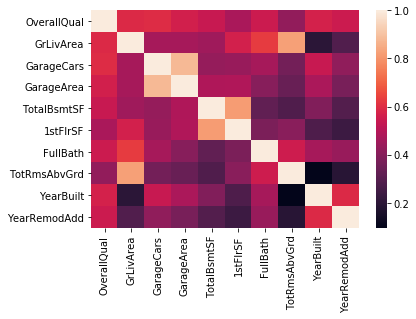

In [168]:
top_corrs_features = list(top_corrs.index.values)
sns.heatmap(houses[top_corrs_features].corr())

In [169]:
features_to_discard = ['GarageArea']
features_to_train = [feature for feature in top_corrs_features if feature not in features_to_discard]

#Select categorical features that have strong correlation to SalePrice
top_corr_cate_feature = ['ExterQual', 'BsmtExposure', 'TotalBath', 'SaleType', 'SaleCondition']
features_to_train = features_to_train + top_corr_cate_feature

In [170]:
X_train = houses.drop(columns=['SalePrice'], axis=0)
Y_train = houses['SalePrice']

X_test = X_test.copy()

X_train['TotalBath'] = X_train['FullBath'] + X_train['BsmtFullBath'] + X_train['BsmtHalfBath'] + X_train['HalfBath']
X_test['TotalBath'] = X_test['FullBath'] + X_test['BsmtFullBath'] + X_test['BsmtHalfBath'] + X_test['HalfBath']

X_train = X_train[features_to_train]
X_test = X_test[features_to_train]



In [171]:
#check missing values in train set
print("Train set missing values")
X_train.isna().sum()

Train set missing values


OverallQual       0
GrLivArea         0
GarageCars        0
TotalBsmtSF       0
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
ExterQual         0
BsmtExposure     38
TotalBath         0
SaleType          0
SaleCondition     0
dtype: int64

In [172]:
#impute missing values in trian set
X_train['BsmtExposure'].fillna('None', inplace=True)

In [173]:
#check missing values in test set
print("Test set missing values")
X_test.isna().sum()

Test set missing values


OverallQual       0
GrLivArea         0
GarageCars        1
TotalBsmtSF       1
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
ExterQual         0
BsmtExposure     44
TotalBath         2
SaleType          1
SaleCondition     0
dtype: int64

In [174]:
X_test['GarageCars'].fillna(X_test['GarageCars'].median(), inplace=True)
X_test['TotalBsmtSF'].fillna(X_test['TotalBsmtSF'].median(), inplace=True)
X_test['TotalBath'].fillna(X_test['TotalBath'].median(), inplace=True)
X_test['BsmtExposure'].fillna('none', inplace=True)
X_test['SaleType'].fillna(X_test['SaleType'].mode()[0], inplace=True)


In [175]:
all_data = pd.concat([X_train, X_test], axis=0)

In [176]:
dtypes = all_data[features_to_train].dtypes
cate_features = dtypes[dtypes == 'object'].index.values
num_features = dtypes[dtypes != 'object'].index.values

In [177]:
all_data = pd.get_dummies(data=all_data, columns=cate_features, drop_first=True)
X_train = all_data.iloc[:X_train.shape[0]]
X_test = all_data.iloc[X_train.shape[0]: ]

In [178]:
X_train_num_scaled = RobustScaler().fit_transform(X_train[num_features])
X_test_num_scaled = RobustScaler().fit_transform(X_test[num_features])

In [179]:
X_train = np.hstack([X_train_num_scaled, X_train.loc[:, [column for column in X_train.columns if column not in num_features]]])
X_test = np.hstack([X_test_num_scaled, X_test.loc[:, [column for column in X_test.columns if column not in num_features]]])



In [180]:
lin = LinearRegression()
cv_scores = cross_val_score(estimator=lin,
                           X= X_train,
                           y=y_train,
                           cv=10,
                           scoring='neg_mean_squared_error' )

In [181]:
-cv_scores.mean()

1348139783.7405593

In [182]:
lin.fit(X_train, y_train)
create_submission(lin.predict(X_test))